<a href="https://colab.research.google.com/github/ahmedebeed555/data-science/blob/master/data3_on_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
#data path     /content/drive/MyDrive/AI Sessions/data3.csv




# Comprehensive Exploratory Data Analysis (EDA)
# 1 Import Required Libraries




In [223]:
# Core data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
# sickit learn
# Display options for better output in Colab
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

# Set plotting style for better visualization in Colab
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")

# Configure matplotlib for inline display in Colab
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

print("📚 All libraries imported successfully!")
print("🎨 Plotting style configured for Google Colab")
print("🔧 Ready for comprehensive EDA!")

📚 All libraries imported successfully!
🎨 Plotting style configured for Google Colab
🔧 Ready for comprehensive EDA!


#2. Load and Inspect Dataset

In [224]:
# Define column names based on the dataset documentation
column_names = [
    'MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE',
    'STARS', 'VOTES', 'RunTime', 'Gross'
]

# Load the datasets
print("📂 Loading datasets...")
df = pd.read_csv('/content/drive/MyDrive/AI Sessions/data3.csv', names=column_names, na_values='?', skipinitialspace=True)

print(f"✅  dataset shape: {df.shape}")
print(f"\n📊 Dataset loaded successfully with {df.shape[0]:,} rows and {df.shape[1]} columns")

📂 Loading datasets...
✅  dataset shape: (10000, 9)

📊 Dataset loaded successfully with 10,000 rows and 9 columns


In [225]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
1,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121,NaN
2,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25,NaN
3,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44,NaN
4,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23,NaN


#2 . Data Inspection

In [226]:
# Initial data inspection
print("🔍 FIRST 5 ROWS:")
print("=" * 80)
display(df.head())

print("\n🔍 LAST 5 ROWS:")
print("=" * 80)
display(df.tail())

print("\n🔍 RANDOM SAMPLE:")
print("=" * 80)
display(df.sample(5))

🔍 FIRST 5 ROWS:


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
1,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121,NaN
2,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25,NaN
3,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44,NaN
4,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23,NaN



🔍 LAST 5 ROWS:


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
9995,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9996,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9997,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9998,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN
9999,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN



🔍 RANDOM SAMPLE:


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6252,Alejandro Riaño: Especial de stand-up,(2018 TV Special),\nComedy,4.9,\nColombian comedian Alejandro Riaño discusses...,"\n Directors:\nRaúl Campos, \nJan Suter\n| ...",60,NaN,NaN
4684,Night Fare,(2015),\nThriller,5.5,\nA night of reunion in Paris goes horribly wr...,\n Director:\nJulien Seri\n| \n Stars:\n...,"1,398",80,NaN
1731,Maid,(2021– ),"\nComedy, Drama",NaN,\nA single mother who turns to housekeeping to...,"\n \n Stars:\nBilly Burke, \nAnd...",NaN,NaN,NaN
4742,Mokalik (Mechanic),(2019),\nComedy,6.3,\n'Mokalik' follows the career of an 11-year-o...,\n Director:\nKunle Afolayan\n| \n Stars...,130,100,NaN
4521,Sitara: Let Girls Dream,(2019),"\nAnimation, Short, Drama",7.3,"\nThe short tells the story of Pari, a 14-year...",\n Director:\nSharmeen Obaid-Chinoy\n,536,15,NaN


In [227]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
1,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121,NaN
2,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25,NaN
3,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44,NaN
4,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23,NaN


#3 . Dataset Overview and Basic Information

In [228]:
# Dataset info and structure
print("📋 DATASET INFO:")
print("=" * 80)
df.info()

print("\n📊 BASIC STATISTICS:")
print("=" * 80)
display(df.describe(include='all'))

print("\n🏷️ DATA TYPES:")
print("=" * 80)
print(df.dtypes)

print("\n📏 DATASET SHAPE:")
print("=" * 80)
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"Total cells: {df.shape[0] * df.shape[1]:,}")

# Memory usage
print(f"\n💾 MEMORY USAGE:")
print("=" * 80)
memory_usage = df.memory_usage(deep=True).sum() / 1024**2
print(f"Total memory usage: {memory_usage:.2f} MB")

📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB

📊 BASIC STATISTICS:


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
count,10000,9356,9920,8180,10000,10000,8180,7042,461
unique,6430,439,511,83,8689,7878,4130,262,333
top,Bleach: Burîchi,(2020– ),\nComedy,7.2,\nAdd a Plot\n,\n,7,24,$0.01M
freq,66,892,852,331,1265,456,35,354,22



🏷️ DATA TYPES:
MOVIES      object
YEAR        object
GENRE       object
RATING      object
ONE-LINE    object
STARS       object
VOTES       object
RunTime     object
Gross       object
dtype: object

📏 DATASET SHAPE:
Rows: 10,000
Columns: 9
Total cells: 90,000

💾 MEMORY USAGE:
Total memory usage: 7.38 MB


In [229]:
df.isna().sum()
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
1,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121,NaN
2,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25,NaN
3,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44,NaN
4,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23,NaN


In [230]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
1,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121,NaN
2,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25,NaN
3,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44,NaN
4,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23,NaN


#4 . Handle Missing Values

In [231]:
# Check for missing values
print("🔍 MISSING VALUES ANALYSIS:")
print("=" * 80)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

🔍 MISSING VALUES ANALYSIS:


In [232]:
missing_df

,Missing Count,Missing Percentage
Gross,9539,95.39
RunTime,2958,29.58
RATING,1820,18.20
VOTES,1820,18.20
YEAR,644,6.44
GENRE,80,0.80
MOVIES,0,0.00
ONE-LINE,0,0.00
STARS,0,0.00


In [233]:
print("Missing values summary:")
print(missing_df[missing_df['Missing Count'] > 0])

Missing values summary:
         Missing Count  Missing Percentage
Gross             9539               95.39
RunTime           2958               29.58
RATING            1820               18.20
VOTES             1820               18.20
YEAR               644                6.44
GENRE               80                0.80


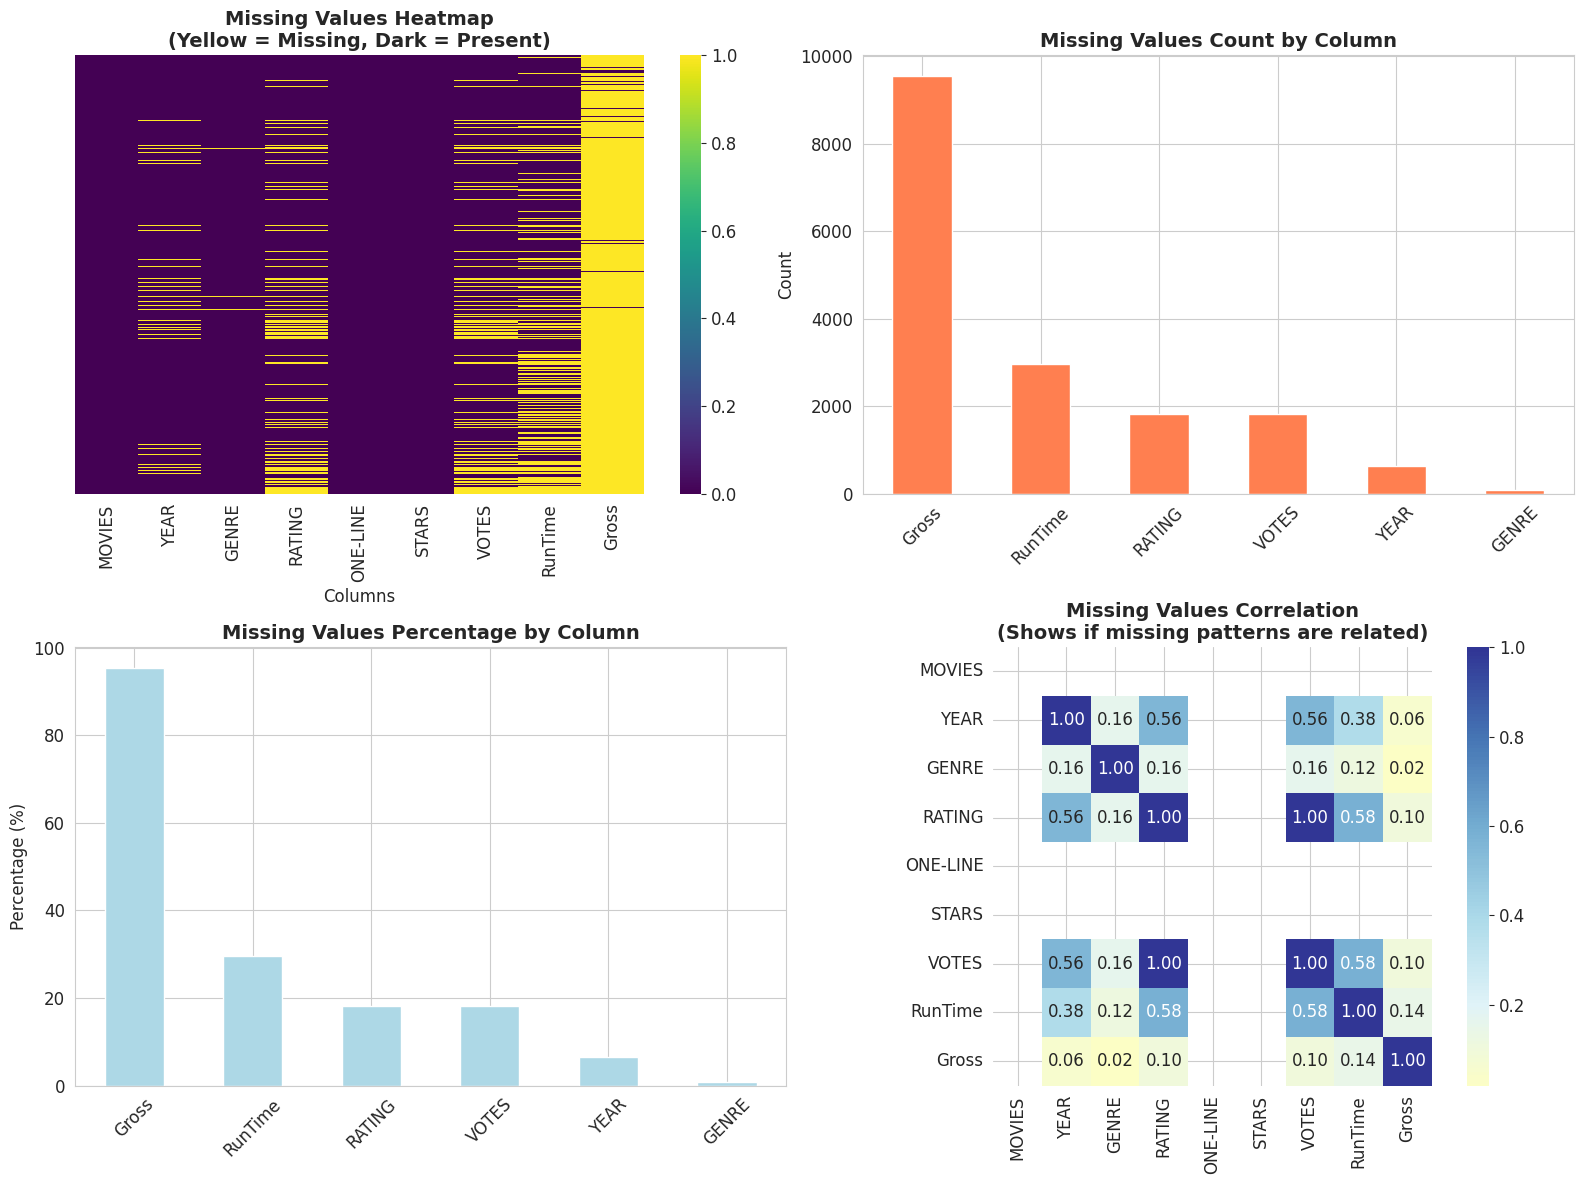


📊 SUMMARY STATISTICS:
Total missing values: 16,861
Percentage of total dataset: 18.73%
Columns with missing values: 6
Complete rows (no missing values): 461 (4.6%)

🔍 MISSING DATA INSIGHTS:
Columns with missing data: ['Gross', 'RunTime', 'RATING', 'VOTES', 'YEAR', 'GENRE']
Rows missing ALL affected columns: 40
Rows missing ANY affected columns: 9539


In [187]:




# Visualize missing values pattern using matplotlib and seaborn
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Missing values heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0,0])
axes[0,0].set_title('Missing Values Heatmap\n(Yellow = Missing, Dark = Present)',
                   fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Columns')

# Missing values bar plot
if missing_df[missing_df['Missing Count'] > 0].shape[0] > 0:
    missing_df[missing_df['Missing Count'] > 0]['Missing Count'].plot(kind='bar',
                                                                     ax=axes[0,1],
                                                                     color='coral')
    axes[0,1].set_title('Missing Values Count by Column', fontsize=14, fontweight='bold')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].set_ylabel('Count')

    # Missing values percentage
    missing_df[missing_df['Missing Count'] > 0]['Missing Percentage'].plot(kind='bar',
                                                                          ax=axes[1,0],
                                                                          color='lightblue')
    axes[1,0].set_title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].set_ylabel('Percentage (%)')
else:
    axes[0,1].text(0.5, 0.5, 'No Missing Values Found', ha='center', va='center',
                  transform=axes[0,1].transAxes, fontsize=16)
    axes[0,1].set_title('No Missing Values', fontsize=14, fontweight='bold')
    axes[1,0].text(0.5, 0.5, 'No Missing Values Found', ha='center', va='center',
                  transform=axes[1,0].transAxes, fontsize=16)
    axes[1,0].set_title('No Missing Values', fontsize=14, fontweight='bold')

# Missing values correlation
missing_corr = df.isnull().corr()
sns.heatmap(missing_corr, annot=True, cmap='RdYlBu', center=0, ax=axes[1,1],
           fmt='.2f', square=True)
axes[1,1].set_title('Missing Values Correlation\n(Shows if missing patterns are related)',
                   fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 SUMMARY STATISTICS:")
print("=" * 40)
print(f"Total missing values: {df.isnull().sum().sum():,}")
print(f"Percentage of total dataset: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")
print(f"Columns with missing values: {len(missing_df[missing_df['Missing Count'] > 0])}")
print(f"Complete rows (no missing values): {df.dropna().shape[0]:,} ({(df.dropna().shape[0]/len(df))*100:.1f}%)")

# Additional insights about missing data patterns
if df.isnull().sum().sum() > 0:
    print(f"\n🔍 MISSING DATA INSIGHTS:")
    print("=" * 40)
    cols_with_missing = missing_df[missing_df['Missing Count'] > 0].index.tolist()
    print(f"Columns with missing data: {cols_with_missing}")

    # Check if missing values occur together
    if len(cols_with_missing) > 1:
        missing_together = df[cols_with_missing].isnull().all(axis=1).sum()
        print(f"Rows missing ALL affected columns: {missing_together}")

        missing_any = df[cols_with_missing].isnull().any(axis=1).sum()
        print(f"Rows missing ANY affected columns: {missing_any}")
else:
    print("\n🎉 No missing values detected in the dataset!")

In [234]:
# Handle missing values with different strategies
print("🔧 HANDLING MISSING VALUES:")
print("=" * 80)

# Create a copy for cleaning
df_cleaned = df.copy()

# Strategy 1: For categorical variables with missing values, replace with mode
categorical_cols_with_missing = ['Gross','RunTime','RATING','VOTES','YEAR','GENRE']

for col in categorical_cols_with_missing:
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
        mode_value = df_cleaned[col].mode().iloc[0] if not df_cleaned[col].mode().empty else 'Unknown'
        df_cleaned[col].fillna(mode_value, inplace=True)
        print(f"✅ Filled {col} missing values with mode: '{mode_value}'")

# Verification
print(f"\n📊 Missing values after cleaning: {df_cleaned.isnull().sum().sum()}")
if df_cleaned.isnull().sum().sum() == 0:
    print("🎉 All missing values handled successfully!")
else:
    print("⚠️  Some missing values remain:")
    print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

🔧 HANDLING MISSING VALUES:
✅ Filled Gross missing values with mode: '$0.01M'
✅ Filled RunTime missing values with mode: '24'
✅ Filled RATING missing values with mode: '7.2'
✅ Filled VOTES missing values with mode: '7'
✅ Filled YEAR missing values with mode: '(2020– )'
✅ Filled GENRE missing values with mode: '
Comedy            '

📊 Missing values after cleaning: 0
🎉 All missing values handled successfully!


In [189]:
df.info()
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      10000 non-null  object
 2   GENRE     10000 non-null  object
 3   RATING    10000 non-null  object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     10000 n

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
1,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121,$0.01M
2,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25,$0.01M
3,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44,$0.01M
4,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23,$0.01M


# 5 . Detect and Handle Duplicates

🔍 DUPLICATE ANALYSIS:
Total duplicate rows: 431
Percentage of duplicates: 4.31%
Duplicates : 431

🔍 SAMPLE DUPLICATE ROWS:


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
9981,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,24,$0.01M
9982,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,24,$0.01M
9983,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,24,$0.01M
9990,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,24,$0.01M
9991,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,24,$0.01M
9992,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,24,$0.01M
9993,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,24,$0.01M
9178,800 metros,(2021– ),\nDocumentary,7.2,\nAdd a Plot\n,\n Director:\nLeón Siminiani\n,7,24,$0.01M
9179,800 metros,(2021– ),\nDocumentary,7.2,\nAdd a Plot\n,\n Director:\nLeón Siminiani\n,7,24,$0.01M
9180,800 metros,(2021– ),\nDocumentary,7.2,\nAdd a Plot\n,\n Director:\nLeón Siminiani\n,7,24,$0.01M


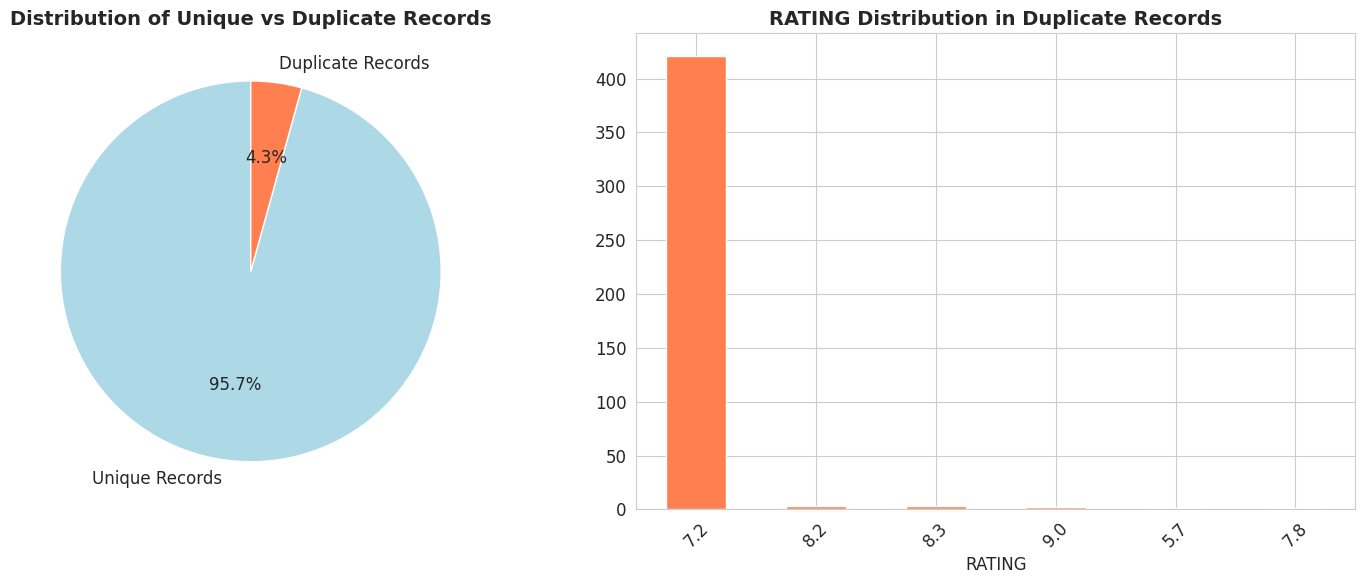


✅ Removed 431 duplicate rows
📊 Dataset shape after removing duplicates: (9569, 9)


In [190]:
# Check for duplicates
print("🔍 DUPLICATE ANALYSIS:")
print("=" * 80)

# Check for exact duplicates
total_duplicates = df_cleaned.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates:,}")
print(f"Percentage of duplicates: {(total_duplicates / len(df_cleaned)) * 100:.2f}%")

# Check for duplicates excluding certain columns (like fnlwgt which might be unique)
#subset_cols = [col for col in df_cleaned.columns if col != 'fnlwgt']
subset_cols = [col for col in df_cleaned.columns]
subset_duplicates = df_cleaned.duplicated(subset=subset_cols).sum()
print(f"Duplicates : {subset_duplicates:,}")

# Show some duplicate examples if they exist
if total_duplicates > 0:
    print("\n🔍 SAMPLE DUPLICATE ROWS:")
    print("=" * 80)
    duplicates = df_cleaned[df_cleaned.duplicated(keep=False)].sort_values(list(df_cleaned.columns))
    display(duplicates.head(10))

# Visualize duplicates by income class
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Duplicate distribution
duplicate_info = pd.DataFrame({
    'Type': ['Unique Records', 'Duplicate Records'],
    'Count': [len(df_cleaned) - total_duplicates, total_duplicates]
})

axes[0].pie(duplicate_info['Count'], labels=duplicate_info['Type'], autopct='%1.1f%%',
           colors=['lightblue', 'coral'], startangle=90)
axes[0].set_title('Distribution of Unique vs Duplicate Records', fontsize=14, fontweight='bold')

# If duplicates exist, show their income distribution
if total_duplicates > 0:
    duplicate_MOVIES = df_cleaned[df_cleaned.duplicated()]['RATING'].value_counts()
    duplicate_MOVIES.plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_title('RATING Distribution in Duplicate Records', fontsize=14, fontweight='bold')
    axes[1].tick_params(axis='x', rotation=45)
else:
    axes[1].text(0.5, 0.5, 'No Duplicates Found', ha='center', va='center',
                transform=axes[1].transAxes, fontsize=16)
    axes[1].set_title('No Duplicates to Display', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Remove duplicates if they exist
if total_duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"\n✅ Removed {total_duplicates:,} duplicate rows")
    print(f"📊 Dataset shape after removing duplicates: {df_cleaned.shape}")
else:
    print("\n🎉 No duplicates found in the dataset!")

In [191]:
df.info()
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    9569 non-null   object
 1   YEAR      9569 non-null   object
 2   GENRE     9569 non-null   object
 3   RATING    9569 non-null   object
 4   ONE-LINE  9569 non-null   object
 5   STARS     9569 non-null   object
 6   VOTES     9569 non-null

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
1,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121,$0.01M
2,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25,$0.01M
3,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44,$0.01M
4,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23,$0.01M


# 6 . Data Type Correction - Gross Handling

In [192]:
# Data type analysis and corrections
print("🔧 DATA TYPE CORRECTIONS:")
print("=" * 80)

print("📋 Current data types:")
print(df_cleaned.dtypes)

# Identify numerical and categorical columns
numerical_cols = ['YEAR', 'RATING', 'VOTES', 'RunTime', 'Gross']
categorical_cols = ['MOVIES', 'GENRE', 'ONE-LINE', 'STARS']

print(f"\n📊 Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"🏷️  Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Convert categorical columns to category type for memory efficiency
for col in categorical_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype('category')
        print(f"✅ Converted {col} to category")

# --- 🔑 Special handling for Gross column (NEW CODE) ---
if 'Gross' in df_cleaned.columns:
    print("\n💰 Cleaning Gross column...")

    # Convert to string, remove $ and commas, expand suffixes
    df_cleaned['Gross'] = (
        df_cleaned['Gross']
        .astype(str)
        .str.replace(r'[\$,]', '', regex=True)  # remove $ and commas
        .str.replace('M', 'e6', regex=False)    # convert M to million
        .str.replace('K', 'e3', regex=False)    # convert K to thousand
        .str.replace('B', 'e9', regex=False)    # convert B to billion (added for safety)
    )

    # Convert to numeric
    df_cleaned['Gross'] = pd.to_numeric(df_cleaned['Gross'], errors='coerce')
    print("✅ Gross column cleaned and converted to numeric")

# Handle other numerical columns normally
for col in numerical_cols:
    if col in df_cleaned.columns and col != 'Gross':  # 👈 Skip Gross here (already handled)
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
        print(f"✅ Ensured {col} is numeric")

print(f"\n📋 Updated data types:")
print(df_cleaned.dtypes)

# Memory usage comparison
print(f"\n💾 MEMORY USAGE OPTIMIZATION:")
print("=" * 80)
memory_after = df_cleaned.memory_usage(deep=True).sum() / 1024**2
print(f"Memory usage after optimization: {memory_after:.2f} MB")

# Show unique values for categorical columns
print(f"\n🏷️  CATEGORICAL VARIABLES UNIQUE VALUES:")
print("=" * 80)
for col in categorical_cols:
    if col in df_cleaned.columns:
        unique_count = df_cleaned[col].nunique()
        print(f"{col}: {unique_count} unique values")
        if unique_count <= 10:
            print(f"   Values: {list(df_cleaned[col].unique())}")
        else:
            print(f"   Sample values: {list(df_cleaned[col].unique()[:5])}...")
        print()


🔧 DATA TYPE CORRECTIONS:
📋 Current data types:
MOVIES      object
YEAR        object
GENRE       object
RATING      object
ONE-LINE    object
STARS       object
VOTES       object
RunTime     object
Gross       object
dtype: object

📊 Numerical columns (5): ['YEAR', 'RATING', 'VOTES', 'RunTime', 'Gross']
🏷️  Categorical columns (4): ['MOVIES', 'GENRE', 'ONE-LINE', 'STARS']
✅ Converted MOVIES to category
✅ Converted GENRE to category
✅ Converted ONE-LINE to category
✅ Converted STARS to category

💰 Cleaning Gross column...
✅ Gross column cleaned and converted to numeric
✅ Ensured YEAR is numeric
✅ Ensured RATING is numeric
✅ Ensured VOTES is numeric
✅ Ensured RunTime is numeric

📋 Updated data types:
MOVIES      category
YEAR         float64
GENRE       category
RATING       float64
ONE-LINE    category
STARS       category
VOTES        float64
RunTime      float64
Gross        float64
dtype: object

💾 MEMORY USAGE OPTIMIZATION:
Memory usage after optimization: 4.96 MB

🏷️  CATEGORICAL 

In [193]:
df.info()
df_cleaned.info()
df_cleaned.head()
df_cleaned.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOVIES    9569 non-null   category
 1   YEAR      0 non-null      float64 
 2   GENRE     9569 non-null   category
 3   RATING    9568 non-null   float64 
 4   ONE-LINE  9569 non-null   category
 5   STARS     9569 non-null   category
 6   VOTES  

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
2934,Room 2806: The Accusation,NaN,"\nDocumentary, Crime",7.0,\nThis docuseries follows the 2011 sexual assa...,"\n \n Stars:\nNafissatou Diallo,...",NaN,197.0,10000.0
3547,"Sleep, My Love",NaN,"\nDrama, Film-Noir, Mystery",6.8,\nChronic sleepwalker Alison Courtland thinks ...,\n Director:\nDouglas Sirk\n| \n Stars:\...,NaN,97.0,1800000.0
2308,The Nailbomber,NaN,"\nDocumentary, Crime, History",6.3,\nThis documentary tells the story of the 1999...,\n Director:\nDaniel Vernon\n| \n Stars:...,NaN,72.0,10000.0
341,Hell or High Water,NaN,"\nAction, Crime, Drama",7.6,\nA divorced father and his ex-con older broth...,\n Director:\nDavid Mackenzie\n| \n Star...,NaN,102.0,26860000.0
3782,Groeten van Gerri,NaN,\nComedy,6.3,\nWhile everyone is at home because of the Cor...,\n Director:\nFrank Lammers\n| \n Stars:...,817.0,100.0,10000.0
5774,Je parle toute seule,NaN,\nComedy,7.8,\nBlanche Gardin presents her new stand-up com...,\n \n Star:\nBlanche Gardin\n,109.0,88.0,10000.0
7441,Cannon Busters,NaN,"\nAnimation, Fantasy",6.5,\nAdd a Plot\n,"\n \n Stars:\nOgie Banks, \nGreg...",62.0,24.0,10000.0
3363,Triad Princess,NaN,"\nAdventure, Drama",6.9,\nA woman who grows up in the shadow of her ma...,"\n \n Stars:\nEugenie Liu, \nJas...",524.0,24.0,10000.0
8678,Dexter,NaN,"\nCrime, Drama, Mystery",8.9,"\nIn the Season Three finale, Dexter attempts ...",\n Director:\nKeith Gordon\n| \n Stars:\...,NaN,51.0,10000.0
93,Gotham,NaN,"\nAction, Crime, Drama",7.8,\nThe story behind Detective James Gordon's ri...,"\n \n Stars:\nBen McKenzie, \nJa...",NaN,42.0,10000.0


In [194]:
df.info()
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOVIES    9569 non-null   category
 1   YEAR      0 non-null      float64 
 2   GENRE     9569 non-null   category
 3   RATING    9568 non-null   float64 
 4   ONE-LINE  9569 non-null   category
 5   STARS     9569 non-null   category
 6   VOTES  

# 7 - Outlier Detection and Treatment

🔍 OUTLIER DETECTION USING IQR METHOD:
📊 STEP 1: VISUALIZING OUTLIERS WITH BOX PLOTS
✅ YEAR: 0 outliers detected (0.00%)
✅ RATING: 459 outliers detected (4.80%)
✅ VOTES: 249 outliers detected (2.60%)
✅ RunTime: 105 outliers detected (1.10%)
✅ Gross: 438 outliers detected (4.58%)


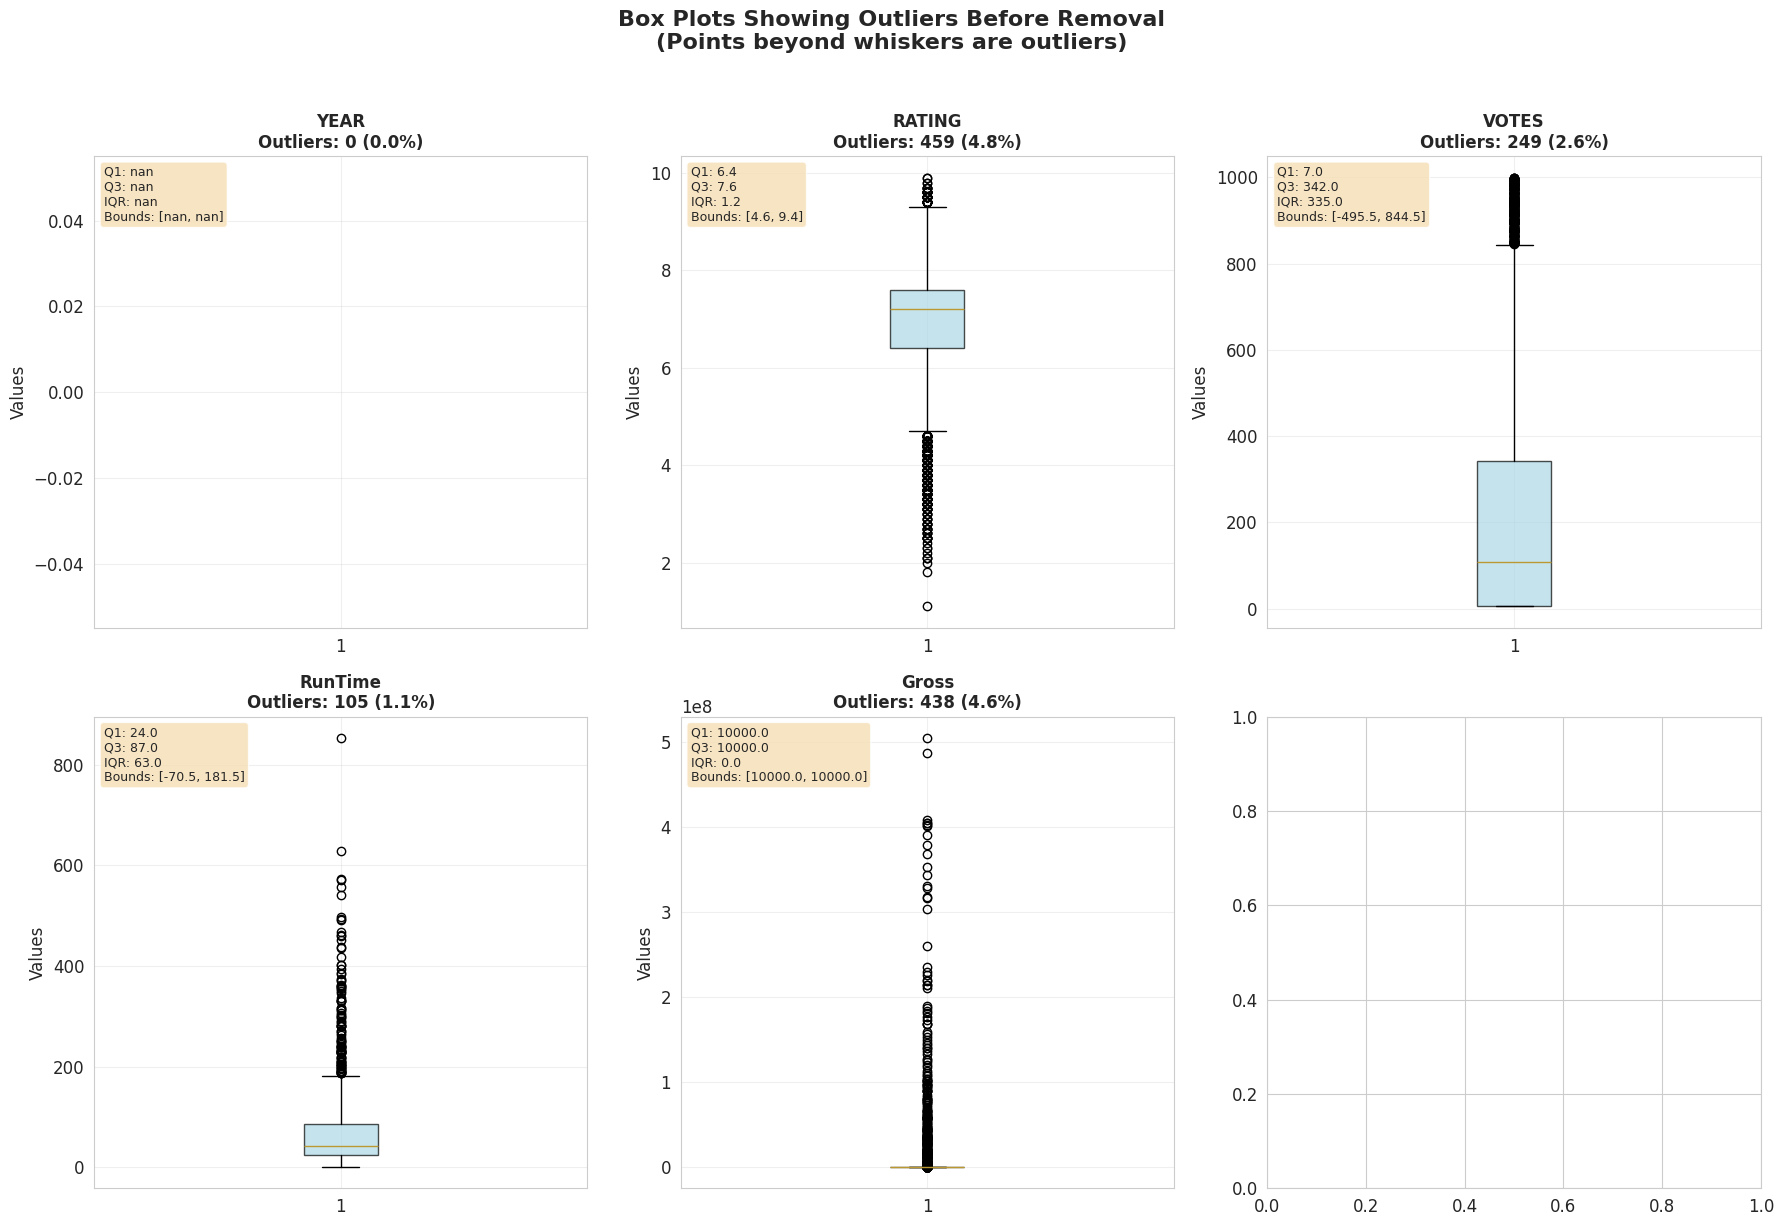


📊 DETAILED OUTLIER SUMMARY:


,Column,Total_Records,Outliers_Count,Outliers_Percentage,Q1,Q3,IQR,Lower_Bound,Upper_Bound,Min_Value,Max_Value
0,YEAR,9569,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RATING,9569,459,4.796739,6.4,7.6,1.2,4.6,9.4,1.1,9.9
2,VOTES,9569,249,2.602153,7.0,342.0,335.0,-495.5,844.5,5.0,999.0
3,RunTime,9569,105,1.097293,24.0,87.0,63.0,-70.5,181.5,1.0,853.0
4,Gross,9569,438,4.577281,10000.0,10000.0,0.0,10000.0,10000.0,0.0,504010000.0


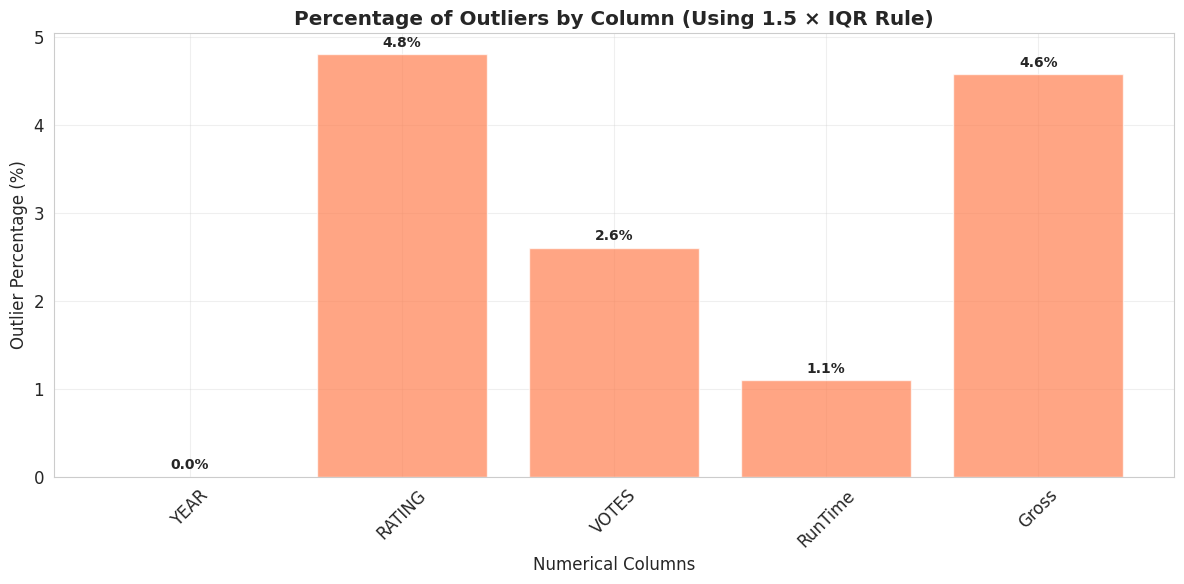


📈 KEY INSIGHTS FROM OUTLIER ANALYSIS:
• Total outlier data points: 1,251
• Average outlier percentage across variables: 2.61%
• Variable with most outliers: RATING (459 outliers)
• Variable with least outliers: YEAR (0 outliers)


In [195]:
# Outlier detection using IQR method (1.5 * IQR rule)
print("🔍 OUTLIER DETECTION USING IQR METHOD:")
print("=" * 80)

def detect_outliers_iqr(df, column):
    """
    Detect outliers using the standard IQR method (1.5 * IQR rule)

    Parameters:
    df: DataFrame
    column: Column name to analyze

    Returns:
    outliers: DataFrame containing outlier records
    lower_bound: Lower boundary for outliers
    upper_bound: Upper boundary for outliers
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Standard 1.5 * IQR rule
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound, Q1, Q3, IQR

# Step 1: VISUALIZE OUTLIERS BEFORE REMOVAL
print("📊 STEP 1: VISUALIZING OUTLIERS WITH BOX PLOTS")
print("=" * 60)

# Create box plots to visualize outliers for all numerical columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

outlier_summary = []

for i, col in enumerate(numerical_cols):
    if col in df_cleaned.columns:
        # Detect outliers using IQR method
        outliers_iqr, lower, upper, Q1, Q3, IQR = detect_outliers_iqr(df_cleaned, col)

        # Store summary information
        outlier_summary.append({
            'Column': col,
            'Total_Records': len(df_cleaned),
            'Outliers_Count': len(outliers_iqr),
            'Outliers_Percentage': (len(outliers_iqr) / len(df_cleaned)) * 100,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower_Bound': lower,
            'Upper_Bound': upper,
            'Min_Value': df_cleaned[col].min(),
            'Max_Value': df_cleaned[col].max()
        })

        # Create box plot with outlier information
        box_plot = axes[i].boxplot(df_cleaned[col].dropna(), patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        box_plot['boxes'][0].set_alpha(0.7)

        axes[i].set_title(f'{col}\nOutliers: {len(outliers_iqr)} ({(len(outliers_iqr)/len(df_cleaned))*100:.1f}%)',
                         fontweight='bold', fontsize=12)
        axes[i].set_ylabel('Values')
        axes[i].grid(True, alpha=0.3)

        # Add statistical information as text
        stats_text = f'Q1: {Q1:.1f}\nQ3: {Q3:.1f}\nIQR: {IQR:.1f}\nBounds: [{lower:.1f}, {upper:.1f}]'
        axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes,
                    verticalalignment='top', fontsize=9,
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

        print(f"✅ {col}: {len(outliers_iqr)} outliers detected ({(len(outliers_iqr)/len(df_cleaned))*100:.2f}%)")

plt.suptitle('Box Plots Showing Outliers Before Removal\n(Points beyond whiskers are outliers)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Display detailed outlier summary
outlier_df = pd.DataFrame(outlier_summary)
print(f"\n📊 DETAILED OUTLIER SUMMARY:")
print("=" * 80)
display(outlier_df)

# Visualize outlier percentages
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
bars = ax.bar(outlier_df['Column'], outlier_df['Outliers_Percentage'], color='coral', alpha=0.7)
ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Outlier Percentage (%)')
ax.set_title('Percentage of Outliers by Column (Using 1.5 × IQR Rule)', fontweight='bold')
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Add percentage labels on bars
for bar, percentage in zip(bars, outlier_df['Outliers_Percentage']):
    height = bar.get_height()
    ax.annotate(f'{percentage:.1f}%',
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3),
               textcoords="offset points",
               ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📈 KEY INSIGHTS FROM OUTLIER ANALYSIS:")
print("=" * 50)
total_outliers = sum(outlier_df['Outliers_Count'])
print(f"• Total outlier data points: {total_outliers:,}")
print(f"• Average outlier percentage across variables: {outlier_df['Outliers_Percentage'].mean():.2f}%")
print(f"• Variable with most outliers: {outlier_df.loc[outlier_df['Outliers_Count'].idxmax(), 'Column']} "
      f"({outlier_df['Outliers_Count'].max():,} outliers)")
print(f"• Variable with least outliers: {outlier_df.loc[outlier_df['Outliers_Count'].idxmin(), 'Column']} "
      f"({outlier_df['Outliers_Count'].min():,} outliers)")

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB


In [197]:
df.info()
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOVIES    9569 non-null   category
 1   YEAR      0 non-null      float64 
 2   GENRE     9569 non-null   category
 3   RATING    9568 non-null   float64 
 4   ONE-LINE  9569 non-null   category
 5   STARS     9569 non-null   category
 6   VOTES  

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,MOVIES,NaN,GENRE,NaN,ONE-LINE,STARS,NaN,NaN,NaN
1,Blood Red Sky,NaN,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,NaN,121.0,10000.0
2,Masters of the Universe: Revelation,NaN,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",NaN,25.0,10000.0
3,The Walking Dead,NaN,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",NaN,44.0,10000.0
4,Rick and Morty,NaN,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",NaN,23.0,10000.0


# 7 B - Outliers Removal


🔧 STEP 2: REMOVING OUTLIERS USING 1.5 × IQR RULE
Applying outlier removal for each numerical variable:
--------------------------------------------------
✅ YEAR: Removed 0 outliers (0.00%)
✅ RATING: Removed 459 outliers (4.80%)
✅ VOTES: Removed 228 outliers (2.50%)
✅ RunTime: Removed 104 outliers (1.17%)
✅ Gross: Removed 418 outliers (4.76%)

📊 OUTLIER REMOVAL SUMMARY:


,Column,Original_Count,Outliers_Removed,Remaining_Count,Removal_Percentage,Original_Mean,New_Mean,Mean_Change,Original_Std,New_Std,Std_Change
0,YEAR,9569,0,9569,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,RATING,9569,459,9110,4.796739,6.960713e+00,7.083467,1.227541e-01,1.131523e+00,0.926794,-2.047294e-01
2,VOTES,9110,228,8882,2.502744,2.182304e+02,187.955585,-3.027483e+01,2.642070e+02,224.346932,-3.986006e+01
3,RunTime,8882,104,8778,1.170907,5.602702e+01,53.054916,-2.972108e+00,4.569890e+01,34.635703,-1.106320e+01
4,Gross,8778,418,8360,4.761905,2.200693e+06,10000.000000,-2.190693e+06,2.066787e+07,0.000000,-2.066787e+07



📊 STEP 3: COMPARING DISTRIBUTIONS BEFORE AND AFTER OUTLIER REMOVAL


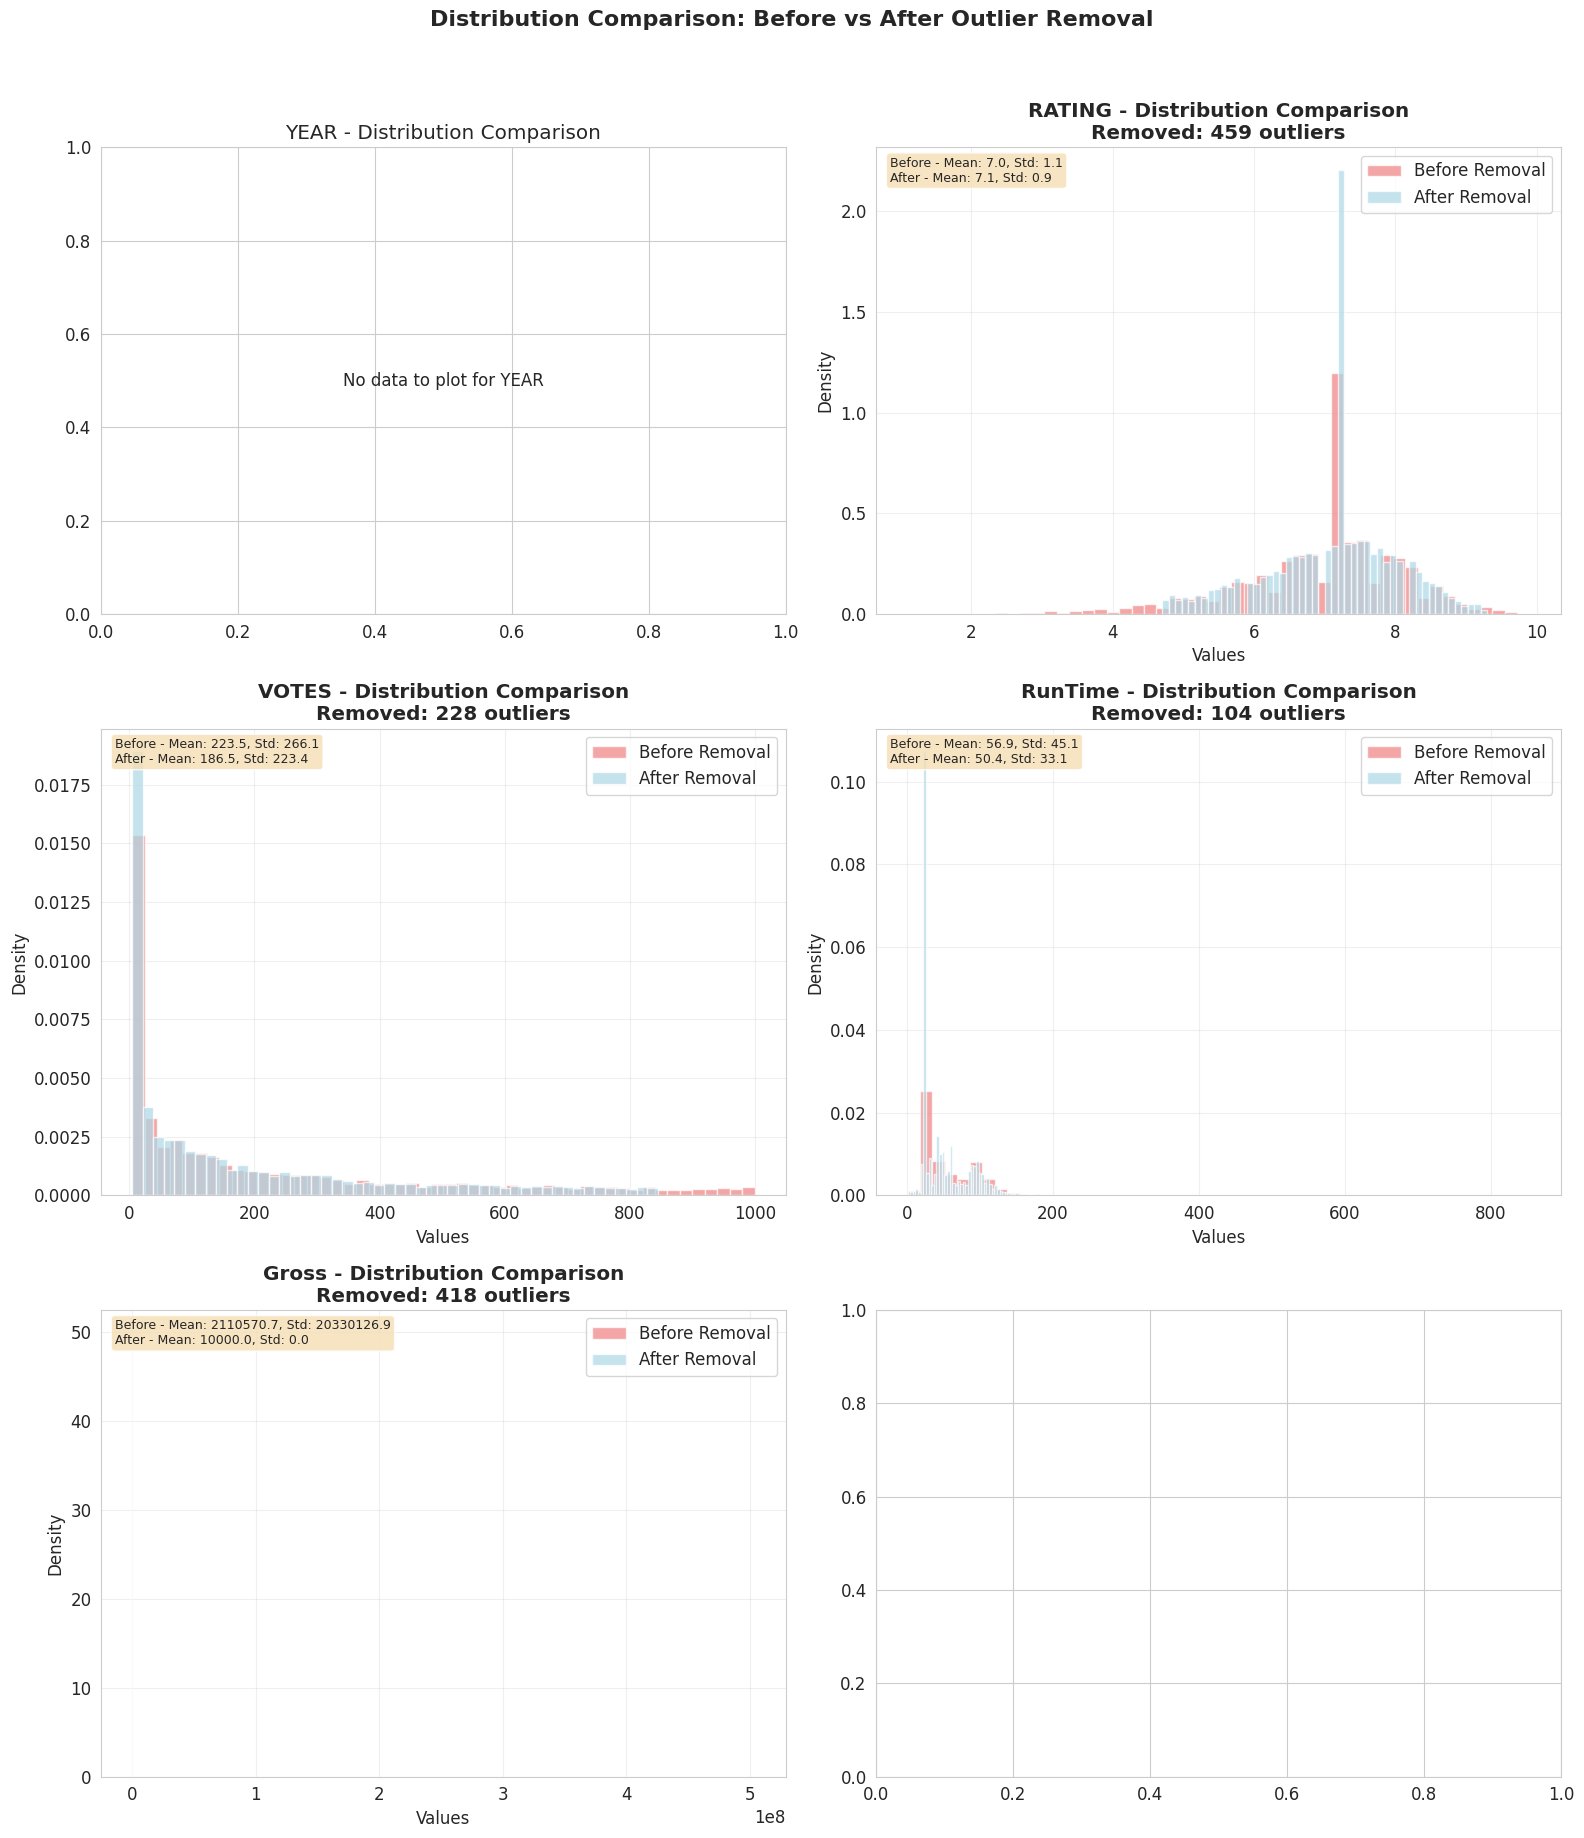


📊 STEP 4: BOX PLOTS AFTER OUTLIER REMOVAL


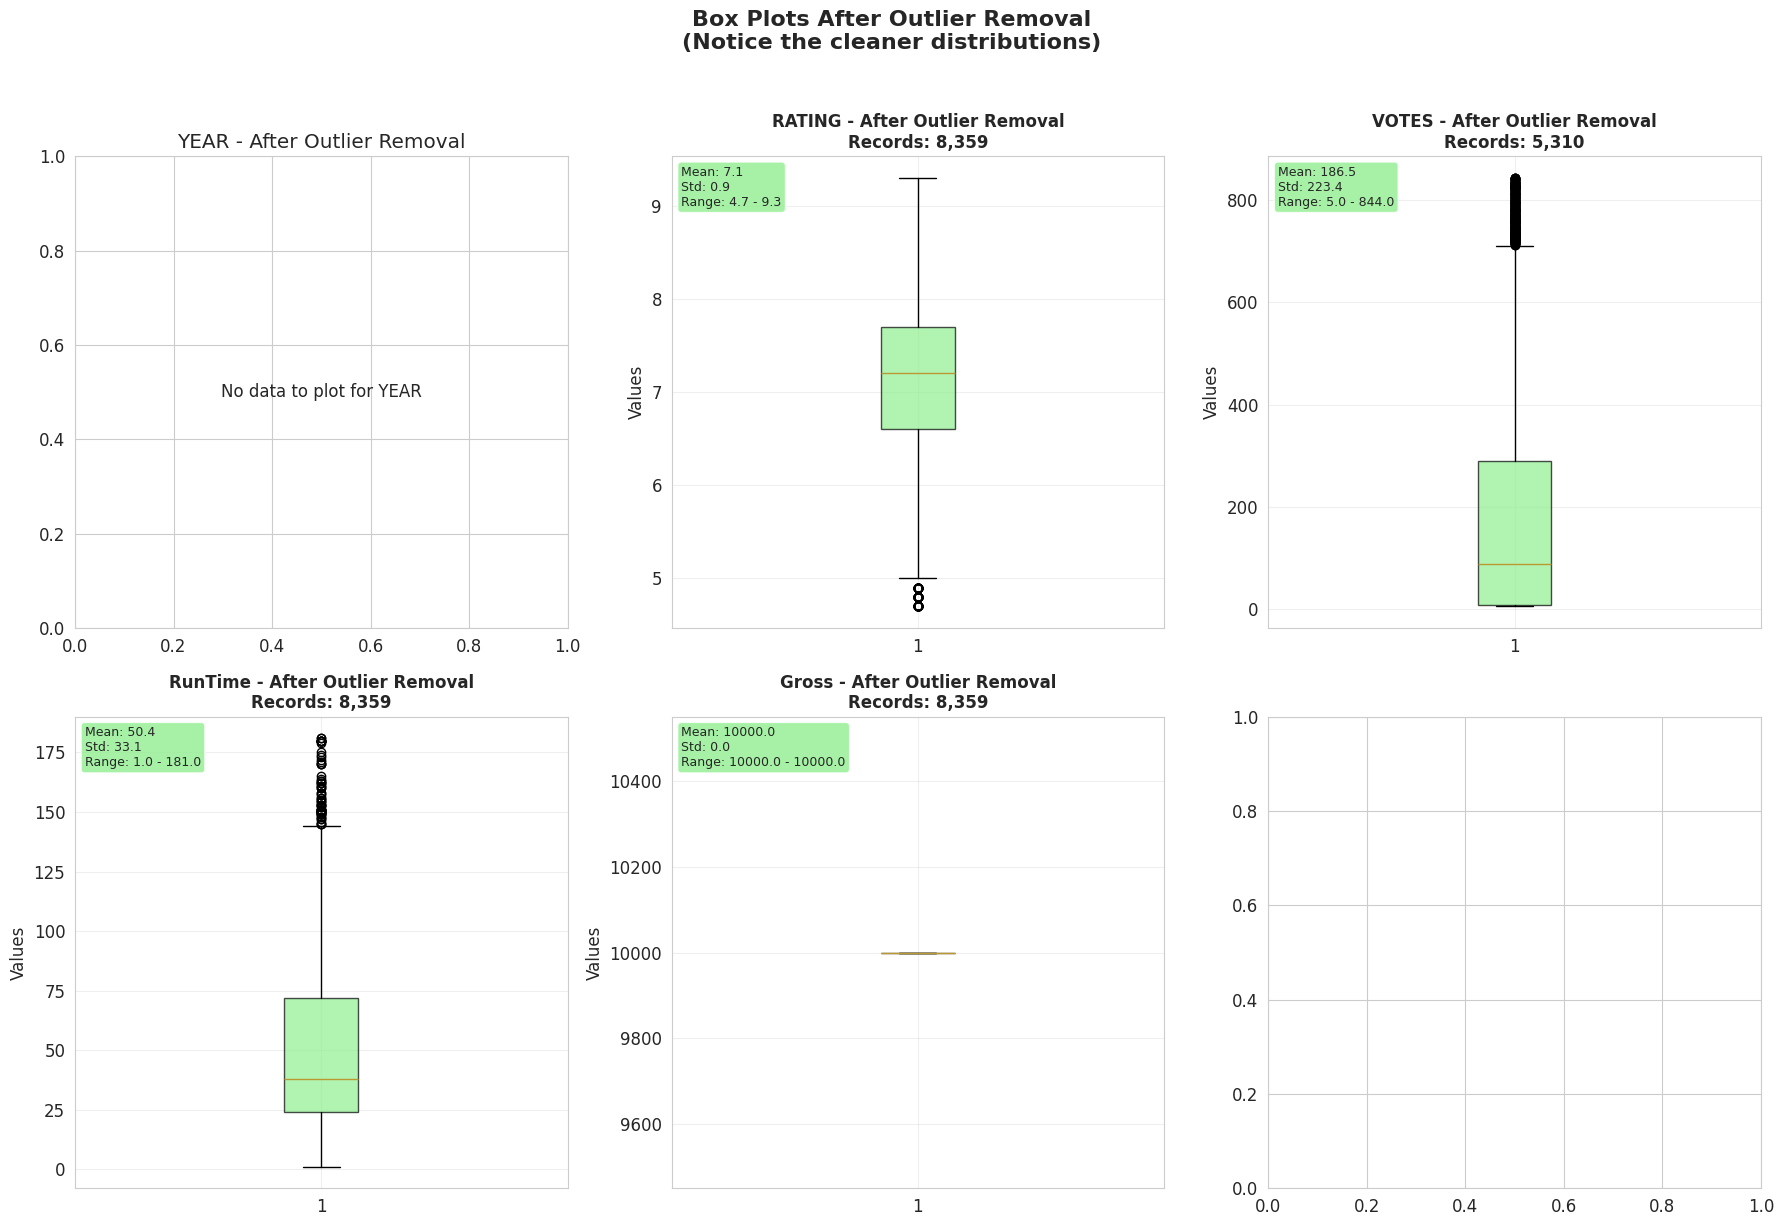


🎯 OUTLIER REMOVAL IMPACT SUMMARY:
• Original dataset size: 9,569 records
• Final dataset size: 8,360 records
• Total records removed: 1,209 (12.63%)
• Data retention rate: 87.4%

📈 STATISTICAL IMPROVEMENTS:
------------------------------
• YEAR:
  - Mean change: N/A
  - Std deviation change: N/A
  - Records removed: 0 (0.0%)
• RATING:
  - Mean change: +0.12
  - Std deviation change: -0.20
  - Records removed: 459 (4.8%)
• VOTES:
  - Mean change: -30.27
  - Std deviation change: -39.86
  - Records removed: 228 (2.5%)
• RunTime:
  - Mean change: -2.97
  - Std deviation change: -11.06
  - Records removed: 104 (1.2%)
• Gross:
  - Mean change: -2190692.72
  - Std deviation change: -20667872.16
  - Records removed: 418 (4.8%)

✅ Outlier removal completed using standard 1.5 × IQR rule!
The dataset now has cleaner distributions suitable for statistical analysis and modeling.


In [198]:
# Step 2: REMOVE OUTLIERS USING 1.5 × IQR RULE
print("\n🔧 STEP 2: REMOVING OUTLIERS USING 1.5 × IQR RULE")
print("=" * 60)

# Create a copy for outlier removal
df_outlier_removed = df_cleaned.copy()
removal_summary = []

print("Applying outlier removal for each numerical variable:")
print("-" * 50)

for col in numerical_cols:
    if col in df_cleaned.columns: # Use df_cleaned to consistently detect outliers
        # Get original stats
        original_count = len(df_outlier_removed)
        original_mean = df_outlier_removed[col].mean()
        original_std = df_outlier_removed[col].std()

        # Detect outliers using the original cleaned data for consistent bounds
        outliers, lower_bound, upper_bound, Q1, Q3, IQR = detect_outliers_iqr(df_cleaned, col)
        outlier_count = len(outliers)

        # Remove outliers from the copy (using boolean indexing)
        # Ensure to handle potential NaNs before comparison
        col_data = df_outlier_removed[col].dropna()
        if not col_data.empty:
            df_outlier_removed = df_outlier_removed[
                (df_outlier_removed[col] >= lower_bound) &
                (df_outlier_removed[col] <= upper_bound) |
                (df_outlier_removed[col].isna()) # Keep rows with NaN in the current column
            ]

        # Calculate new stats
        new_count = len(df_outlier_removed)
        new_mean = df_outlier_removed[col].mean()
        new_std = df_outlier_removed[col].std()

        # Store removal summary
        removal_percentage = ((original_count - new_count) / original_count) * 100 if original_count > 0 else 0

        removal_summary.append({
            'Column': col,
            'Original_Count': original_count,
            'Outliers_Removed': original_count - new_count,
            'Remaining_Count': new_count,
            'Removal_Percentage': removal_percentage,
            'Original_Mean': original_mean,
            'New_Mean': new_mean,
            'Mean_Change': new_mean - original_mean if not pd.isna(new_mean) and not pd.isna(original_mean) else np.nan,
            'Original_Std': original_std,
            'New_Std': new_std,
            'Std_Change': new_std - original_std if not pd.isna(new_std) and not pd.isna(original_std) else np.nan
        })

        print(f"✅ {col}: Removed {original_count - new_count:,} outliers "
              f"({removal_percentage:.2f}%)"
              )

removal_df = pd.DataFrame(removal_summary)
print(f"\n📊 OUTLIER REMOVAL SUMMARY:")
print("=" * 80)
display(removal_df)

# Step 3: VISUALIZE THE EFFECT OF OUTLIER REMOVAL
print(f"\n📊 STEP 3: COMPARING DISTRIBUTIONS BEFORE AND AFTER OUTLIER REMOVAL")
print("=" * 70)

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if col in df_cleaned.columns:
        # Plot histograms comparing before and after
        # Ensure data exists before plotting
        if not df_cleaned[col].dropna().empty and not df_outlier_removed[col].dropna().empty:
            axes[i].hist(df_cleaned[col], bins=50, alpha=0.7, label='Before Removal',
                        color='lightcoral', density=True)
            axes[i].hist(df_outlier_removed[col].dropna(), bins=50, alpha=0.7, label='After Removal',
                        color='lightblue', density=True)

            axes[i].set_title(f'{col} - Distribution Comparison\n'
                             f'Removed: {removal_df[removal_df["Column"]==col]["Outliers_Removed"].iloc[0]:,} outliers',
                             fontweight='bold')
            axes[i].set_xlabel('Values')
            axes[i].set_ylabel('Density')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)

            # Add statistical information
            before_stats = f'Before - Mean: {df_cleaned[col].mean():.1f}, Std: {df_cleaned[col].std():.1f}'
            after_stats = f'After - Mean: {df_outlier_removed[col].mean():.1f}, Std: {df_outlier_removed[col].std():.1f}'

            axes[i].text(0.02, 0.98, f'{before_stats}\n{after_stats}',
                        transform=axes[i].transAxes, verticalalignment='top', fontsize=9,
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        else:
             axes[i].text(0.5, 0.5, f'No data to plot for {col}', horizontalalignment='center', verticalalignment='center')
             axes[i].set_title(f'{col} - Distribution Comparison')


plt.suptitle('Distribution Comparison: Before vs After Outlier Removal',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Step 4: BOX PLOTS AFTER OUTLIER REMOVAL
print(f"\n📊 STEP 4: BOX PLOTS AFTER OUTLIER REMOVAL")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if col in df_outlier_removed.columns:
        # Create box plot for cleaned data
        # Ensure data exists before plotting
        col_data_cleaned = df_outlier_removed[col].dropna()
        if not col_data_cleaned.empty:
            box_plot = axes[i].boxplot(col_data_cleaned, patch_artist=True)
            box_plot['boxes'][0].set_facecolor('lightgreen')
            box_plot['boxes'][0].set_alpha(0.7)

            axes[i].set_title(f'{col} - After Outlier Removal\n'
                             f'Records: {len(col_data_cleaned):,}',
                             fontweight='bold', fontsize=12)
            axes[i].set_ylabel('Values')
            axes[i].grid(True, alpha=0.3)

            # Add new statistics
            new_stats = f'Mean: {col_data_cleaned.mean():.1f}\nStd: {col_data_cleaned.std():.1f}\nRange: {col_data_cleaned.min():.1f} - {col_data_cleaned.max():.1f}'
            axes[i].text(0.02, 0.98, new_stats, transform=axes[i].transAxes,
                        verticalalignment='top', fontsize=9,
                        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
        else:
            axes[i].text(0.5, 0.5, f'No data to plot for {col}', horizontalalignment='center', verticalalignment='center')
            axes[i].set_title(f'{col} - After Outlier Removal')


plt.suptitle('Box Plots After Outlier Removal\n(Notice the cleaner distributions)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Final summary
print(f"\n🎯 OUTLIER REMOVAL IMPACT SUMMARY:")
print("=" * 50)
original_size = len(df_cleaned)
final_size = len(df_outlier_removed)
total_removed = original_size - final_size

print(f"• Original dataset size: {original_size:,} records")
print(f"• Final dataset size: {final_size:,} records")
print(f"• Total records removed: {total_removed:,} ({(total_removed/original_size)*100:.2f}%)")
print(f"• Data retention rate: {(final_size/original_size)*100:.1f}%")

print(f"\n📈 STATISTICAL IMPROVEMENTS:")
print("-" * 30)
for _, row in removal_df.iterrows():
    col = row['Column']
    print(f"• {col}:")
    print(f"  - Mean change: {row['Mean_Change']:+.2f}" if not pd.isna(row['Mean_Change']) else "  - Mean change: N/A")
    print(f"  - Std deviation change: {row['Std_Change']:+.2f}" if not pd.isna(row['Std_Change']) else "  - Std deviation change: N/A")
    print(f"  - Records removed: {row['Outliers_Removed']:,} ({row['Removal_Percentage']:.1f}%)")


print(f"\n✅ Outlier removal completed using standard 1.5 × IQR rule!")
print("The dataset now has cleaner distributions suitable for statistical analysis and modeling.")

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB


In [200]:
df.info()
df_cleaned.info()
df_cleaned.head()
df_cleaned.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOVIES    9569 non-null   category
 1   YEAR      0 non-null      float64 
 2   GENRE     9569 non-null   category
 3   RATING    9568 non-null   float64 
 4   ONE-LINE  9569 non-null   category
 5   STARS     9569 non-null   category
 6   VOTES  

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
8845,Dark Desire,NaN,"\nDrama, Mystery, Thriller",7.1,\nFlashbacks reveal the start of Lucinda's ill...,"\n \n Stars:\nMaite Perroni, \nE...",96.0,24.0,10000.0
3585,Cek Toko Sebelah: The Series,NaN,\nComedy,8.3,\nThe series takes place when Erwin (Ernest Pr...,"\n \n Stars:\nErnest Prakasa, \n...",96.0,22.0,10000.0
8499,7Seeds,NaN,"\nAnimation, Action, Adventure",6.7,\nAngo's hallucinations lead to perilous situa...,"\n \n Stars:\nMorgan Berry, \nAm...",21.0,24.0,10000.0
8170,Kalifat,NaN,"\nCrime, Drama, Thriller",7.9,\nFatima continues investigating despite being...,\n Director:\nGoran Kapetanovic\n| \n St...,292.0,47.0,10000.0
6286,Untitled Elodie Polo Ackerman/Netflix Docuseries,NaN,\nDocumentary,7.2,\nDocuseries examining the shocking abduction ...,\n,7.0,24.0,10000.0
7734,La casa de las flores,NaN,"\nComedy, Drama",6.4,\nDiego confronts Lucía about a secret she's b...,\n Director:\nYibran Asuad\n| \n Stars:\...,123.0,24.0,10000.0
5727,We Couldn't Become Adults,NaN,"\nDrama, Romance",7.2,\nA friend request with a lost love sends a ma...,\n \n Star:\nMirai Moriyama\n,7.0,24.0,10000.0
3731,Das letzte Wort,NaN,"\nComedy, Drama",7.1,\nWhile still working through her husband's re...,"\n \n Stars:\nAnke Engelke, \nTh...",816.0,40.0,10000.0
6723,Home for Christmas,NaN,"\nComedy, Drama, Romance",7.5,\nAdd a Plot\n,"\n Directors:\nAnna Gutto, \nPer-Olav Søren...",189.0,27.0,10000.0
4421,Awake: The Million Dollar Game,NaN,\nGame-Show,5.9,\n24 hours. Zero rest. 1 million dollars on th...,"\n \n Stars:\nJames Davis, \nRus...",681.0,41.0,10000.0


# 8 - Univariate Analysis - Numerical Variables



📊 UNIVARIATE ANALYSIS - NUMERICAL VARIABLES:
We'll analyze each numerical variable individually to understand:
• Distribution shape (normal, skewed, bimodal, etc.)
• Central tendency (mean, median, mode)
• Spread (standard deviation, variance, range)
• Outliers and extreme values
• Statistical properties for modeling

📈 COMPREHENSIVE STATISTICAL SUMMARY:


,Variable,Count,Mean,Median,Mode,Std_Dev,Variance,Min,Max,Range,Q1,Q3,IQR,Skewness,Kurtosis,CV
0,YEAR,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RATING,8359,7.09,7.2,7.2,0.93,0.86,4.7,9.3,4.6,6.6,7.7,1.1,-0.37,0.01,13.06
2,VOTES,5310,186.51,88.0,7.0,223.42,49918.42,5.0,844.0,839.0,7.0,289.0,282.0,1.30,0.61,119.79
3,RunTime,8359,50.38,38.0,24.0,33.06,1092.65,1.0,181.0,180.0,24.0,72.0,48.0,1.05,0.16,65.61
4,Gross,8359,10000.00,10000.0,10000.0,0.00,0.00,10000.0,10000.0,0.0,10000.0,10000.0,0.0,NaN,NaN,0.00


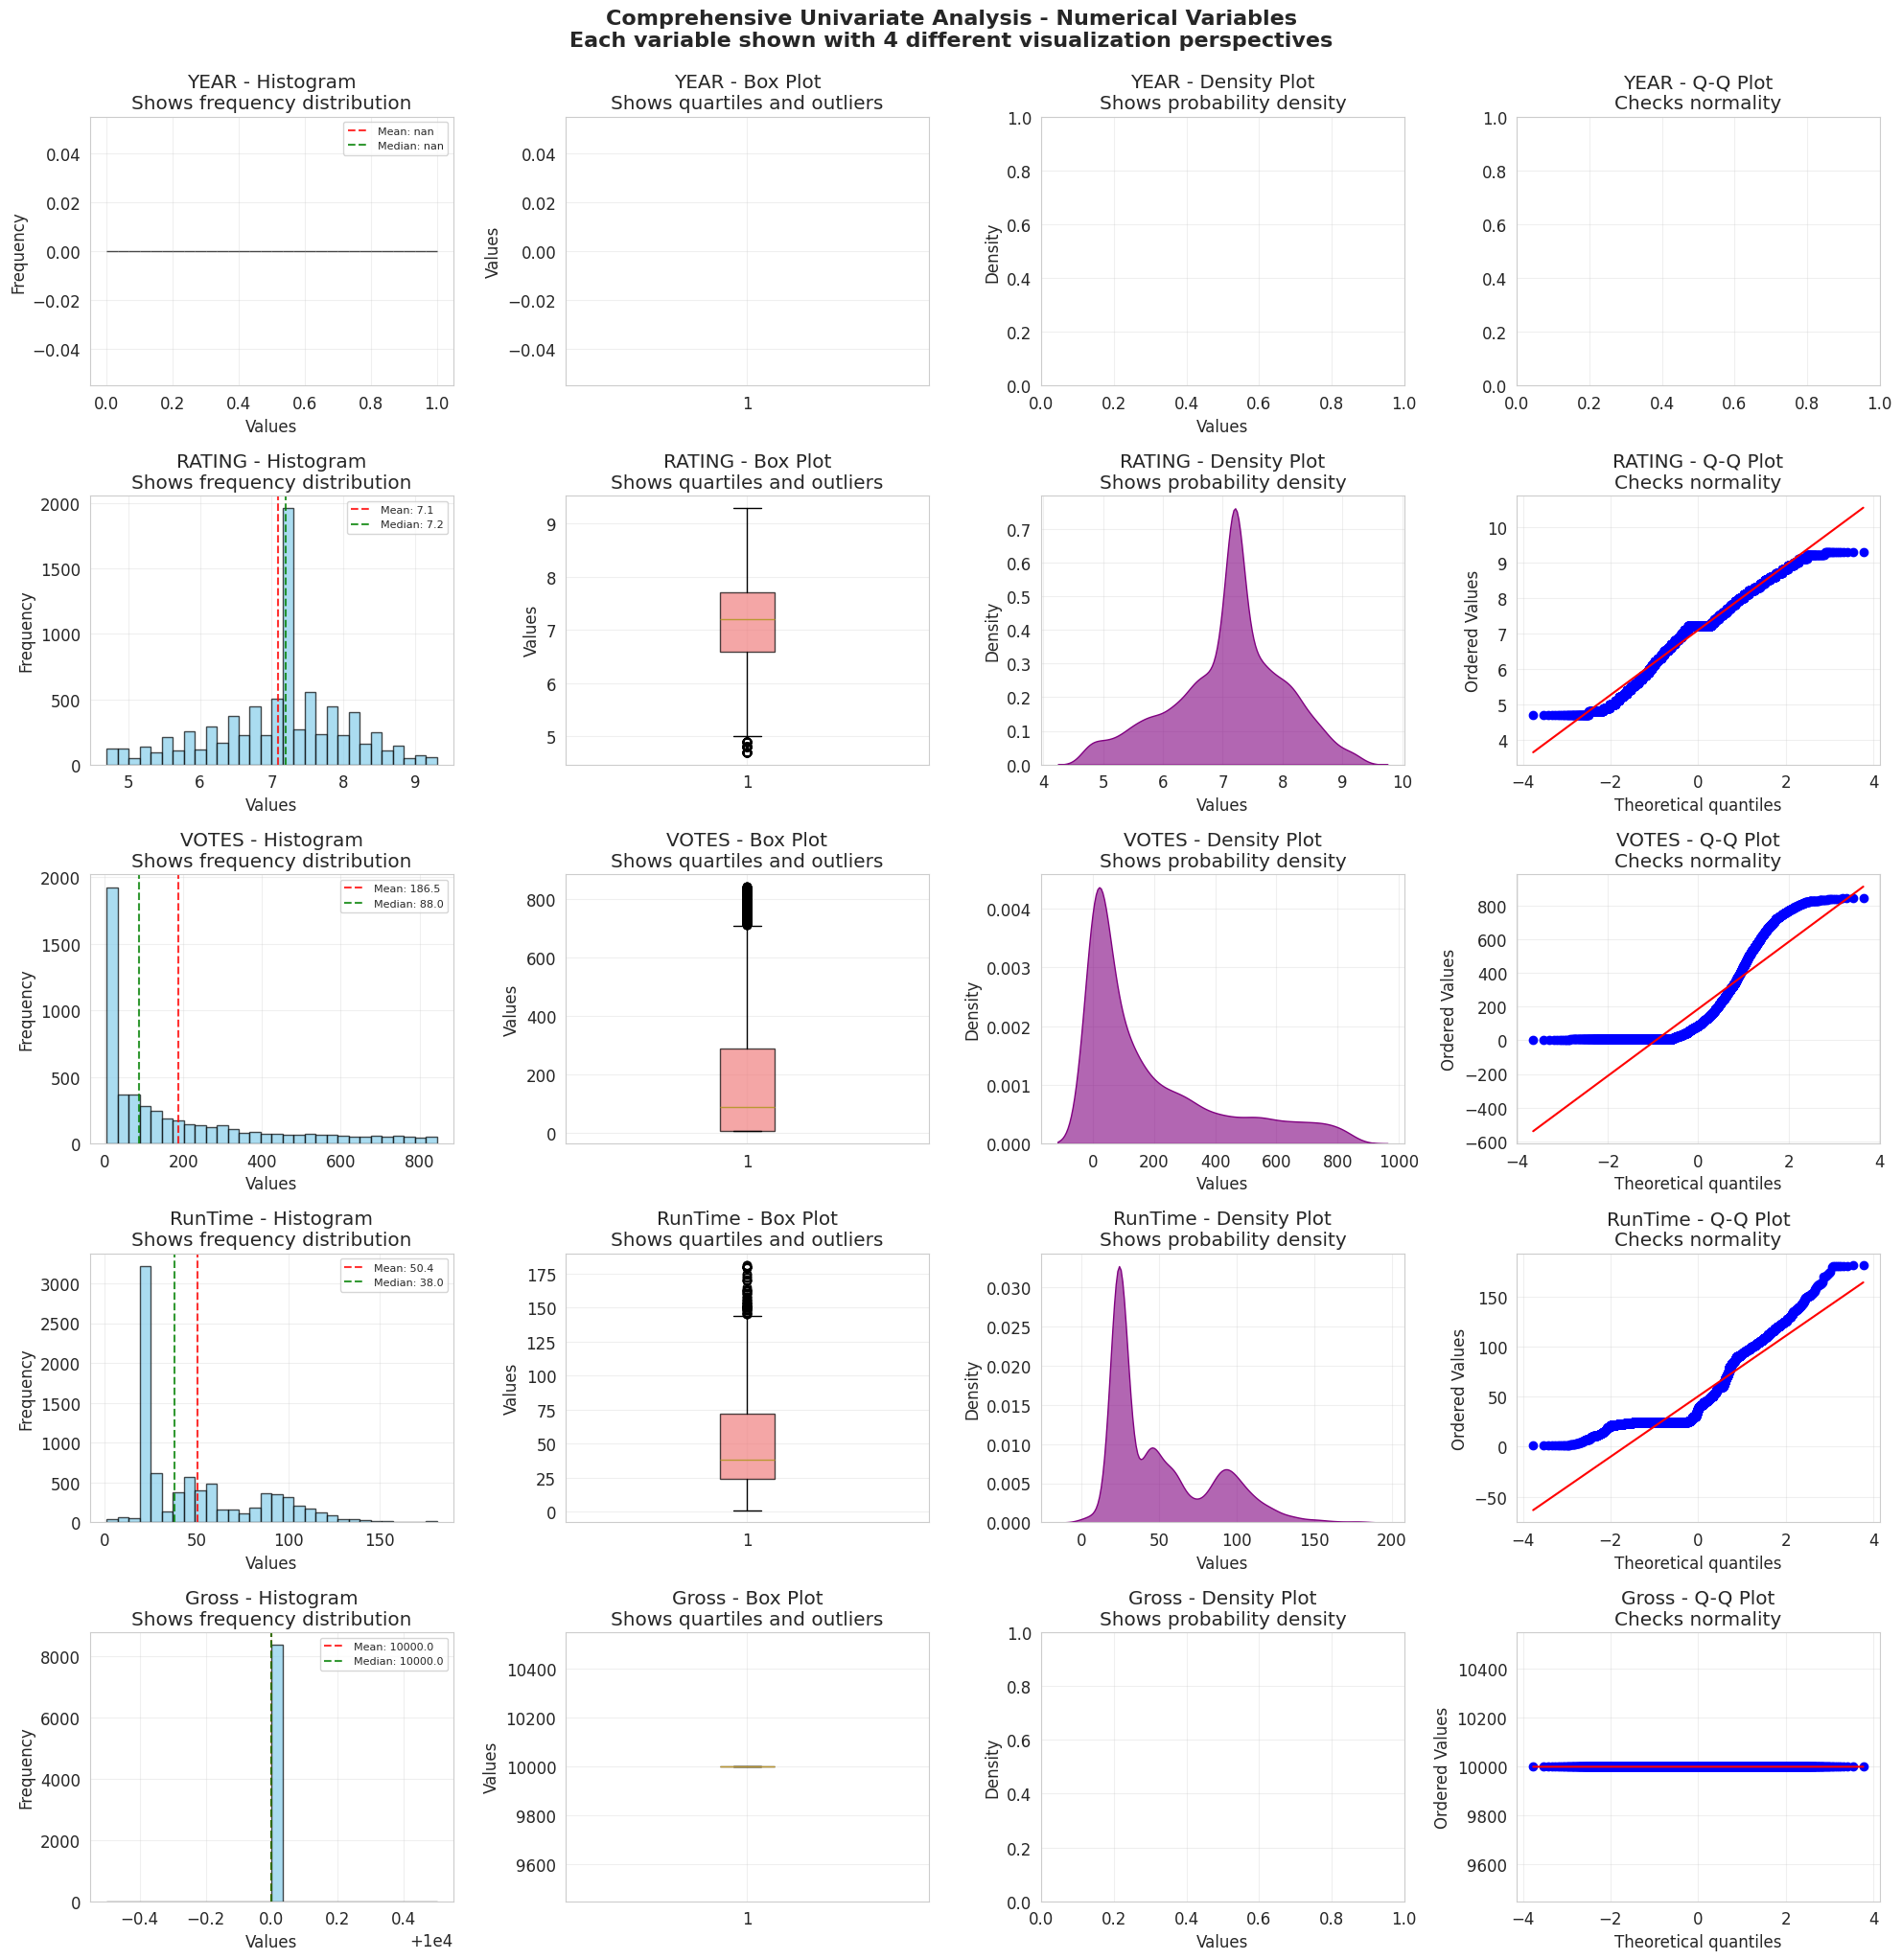


🔍 DISTRIBUTION ANALYSIS & INSIGHTS:

📊 YEAR:
------------------------------
• Distribution: highly skewed
• Peak shape: mesokurtic (similar to normal)
• Variability: high variability (CV: nan%)
• Central tendency: Mean=nan, Median=nan
• Spread: Std=nan, Range=nan

📊 RATING:
------------------------------
• Distribution: approximately symmetric (left-tailed)
• Peak shape: mesokurtic (similar to normal)
• Variability: low variability (CV: 13.1%)
• Central tendency: Mean=7.1, Median=7.2
• Spread: Std=0.9, Range=4.6

📊 VOTES:
------------------------------
• Distribution: highly skewed (right-tailed)
• Peak shape: mesokurtic (similar to normal)
• Variability: high variability (CV: 119.8%)
• Central tendency: Mean=186.5, Median=88.0
• Spread: Std=223.4, Range=839.0

📊 RUNTIME:
------------------------------
• Distribution: highly skewed (right-tailed)
• Peak shape: mesokurtic (similar to normal)
• Variability: high variability (CV: 65.6%)
• Central tendency: Mean=50.4, Median=38.0
• Spread

In [201]:
# Use the cleaned dataset without outliers for analysis
df_analysis = df_outlier_removed.copy()

print("📊 UNIVARIATE ANALYSIS - NUMERICAL VARIABLES:")
print("=" * 80)
print("We'll analyze each numerical variable individually to understand:")
print("• Distribution shape (normal, skewed, bimodal, etc.)")
print("• Central tendency (mean, median, mode)")
print("• Spread (standard deviation, variance, range)")
print("• Outliers and extreme values")
print("• Statistical properties for modeling")
print()

# Comprehensive statistical summary
numerical_stats_summary = []

for col in numerical_cols:
    if col in df_analysis.columns:
        data = df_analysis[col].dropna()

        # Calculate comprehensive statistics
        stats_dict = {
            'Variable': col,
            'Count': len(data),
            'Mean': data.mean(),
            'Median': data.median(),
            'Mode': data.mode().iloc[0] if not data.mode().empty else np.nan,
            'Std_Dev': data.std(),
            'Variance': data.var(),
            'Min': data.min(),
            'Max': data.max(),
            'Range': data.max() - data.min(),
            'Q1': data.quantile(0.25),
            'Q3': data.quantile(0.75),
            'IQR': data.quantile(0.75) - data.quantile(0.25),
            'Skewness': stats.skew(data),
            'Kurtosis': stats.kurtosis(data),
            'CV': (data.std() / data.mean()) * 100 if data.mean() != 0 else np.nan  # Coefficient of Variation
        }
        numerical_stats_summary.append(stats_dict)

stats_df = pd.DataFrame(numerical_stats_summary)
print("📈 COMPREHENSIVE STATISTICAL SUMMARY:")
print("=" * 80)
display(stats_df.round(2))

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 24))

for i, col in enumerate(numerical_cols):
    if col in df_analysis.columns:
        data = df_analysis[col].dropna()

        # Create subplot grid: 4 plots per variable
        # Histogram
        plt.subplot(6, 4, i*4 + 1)
        plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'{col} - Histogram\nShows frequency distribution')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)

        # Add mean and median lines
        plt.axvline(data.mean(), color='red', linestyle='--', alpha=0.8, label=f'Mean: {data.mean():.1f}')
        plt.axvline(data.median(), color='green', linestyle='--', alpha=0.8, label=f'Median: {data.median():.1f}')
        plt.legend(fontsize=8)

        # Box plot
        plt.subplot(6, 4, i*4 + 2)
        box_plot = plt.boxplot(data, patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightcoral')
        box_plot['boxes'][0].set_alpha(0.7)
        plt.title(f'{col} - Box Plot\nShows quartiles and outliers')
        plt.ylabel('Values')
        plt.grid(True, alpha=0.3)

        # Density plot (KDE)
        plt.subplot(6, 4, i*4 + 3)
        sns.kdeplot(data=data, color='purple', fill=True, alpha=0.6)
        plt.title(f'{col} - Density Plot\nShows probability density')
        plt.xlabel('Values')
        plt.ylabel('Density')
        plt.grid(True, alpha=0.3)

        # Q-Q plot
        plt.subplot(6, 4, i*4 + 4)
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f'{col} - Q-Q Plot\nChecks normality')
        plt.grid(True, alpha=0.3)

plt.suptitle('Comprehensive Univariate Analysis - Numerical Variables\n'
             'Each variable shown with 4 different visualization perspectives',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Interpretation of distributions
print("\n🔍 DISTRIBUTION ANALYSIS & INSIGHTS:")
print("=" * 80)

for _, row in stats_df.iterrows():
    col = row['Variable']
    skew = row['Skewness']
    kurt = row['Kurtosis']
    cv = row['CV']

    print(f"\n📊 {col.upper()}:")
    print("-" * 30)

    # Skewness interpretation
    if abs(skew) < 0.5:
        skew_desc = "approximately symmetric"
    elif abs(skew) < 1.0:
        skew_desc = "moderately skewed"
    else:
        skew_desc = "highly skewed"

    if skew > 0:
        skew_desc += " (right-tailed)"
    elif skew < 0:
        skew_desc += " (left-tailed)"

    # Kurtosis interpretation
    if kurt < -1:
        kurt_desc = "platykurtic (flatter than normal)"
    elif kurt > 1:
        kurt_desc = "leptokurtic (more peaked than normal)"
    else:
        kurt_desc = "mesokurtic (similar to normal)"

    # Coefficient of variation interpretation
    if cv < 15:
        var_desc = "low variability"
    elif cv < 35:
        var_desc = "moderate variability"
    else:
        var_desc = "high variability"

    print(f"• Distribution: {skew_desc}")
    print(f"• Peak shape: {kurt_desc}")
    print(f"• Variability: {var_desc} (CV: {cv:.1f}%)")
    print(f"• Central tendency: Mean={row['Mean']:.1f}, Median={row['Median']:.1f}")
    print(f"• Spread: Std={row['Std_Dev']:.1f}, Range={row['Range']:.1f}")

    # Practical insights
    if col == 'age':
        print("• Business insight: Age distribution affects life insurance, retirement planning")
    elif col == 'hours-per-week':
        print("• Business insight: Work hours relate to productivity and work-life balance")
    elif col == 'education-num':
        print("• Business insight: Education level strongly correlates with income potential")
    elif 'capital' in col:
        print("• Business insight: Investment income indicates wealth and financial status")

# Summary statistics comparison
print(f"\n📋 SUMMARY INSIGHTS:")
print("=" * 40)
print(f"• Most variable: {stats_df.loc[stats_df['CV'].idxmax(), 'Variable']} (CV: {stats_df['CV'].max():.1f}%)")
print(f"• Least variable: {stats_df.loc[stats_df['CV'].idxmin(), 'Variable']} (CV: {stats_df['CV'].min():.1f}%)")
print(f"• Most skewed: {stats_df.loc[stats_df['Skewness'].abs().idxmax(), 'Variable']} (Skew: {stats_df['Skewness'].abs().max():.2f})")
print(f"• Most normal-like: {stats_df.loc[stats_df['Skewness'].abs().idxmin(), 'Variable']} (Skew: {stats_df['Skewness'].abs().min():.2f})")

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB


In [203]:
df.info()
df_cleaned.info()
df_cleaned.head()
df_cleaned.sample(15)
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOVIES    9569 non-null   category
 1   YEAR      0 non-null      float64 
 2   GENRE     9569 non-null   category
 3   RATING    9568 non-null   float64 
 4   ONE-LINE  9569 non-null   category
 5   STARS     9569 non-null   category
 6   VOTES  

#9 - Univariate Analysis - Categorial Variables

In [204]:
# Comprehensive univariate analysis for categorical variables
print("🏷️  UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES:")
print("=" * 80)
print("We'll analyze each categorical variable to understand:")
print("• Value distributions and frequencies")
print("• Category balance (are classes evenly distributed?)")
print("• Potential data quality issues")
print("• Business relevance of each category")
print("• Relationships with target variable preparation")
print()

# Frequency analysis
categorical_summary = []
for col in categorical_cols:
    if col in df_analysis.columns:
        value_counts = df_analysis[col].value_counts()
        proportions = df_analysis[col].value_counts(normalize=True) * 100

        categorical_summary.append({
            'Variable': col,
            'Unique_Values': df_analysis[col].nunique(),
            'Most_Common': value_counts.index[0],
            'Most_Common_Count': value_counts.iloc[0],
            'Most_Common_Percent': proportions.iloc[0],
            'Least_Common': value_counts.index[-1],
            'Least_Common_Count': value_counts.iloc[-1],
            'Least_Common_Percent': proportions.iloc[-1],
            'Diversity_Index': 1 - ((proportions/100)**2).sum()  # Simpson's Diversity Index
        })

cat_summary_df = pd.DataFrame(categorical_summary)
print("📊 CATEGORICAL VARIABLES SUMMARY:")
print("=" * 80)
display(cat_summary_df.round(3))



# Detailed frequency tables with business insights
print("\n📋 DETAILED FREQUENCY ANALYSIS WITH INSIGHTS:")
print("=" * 80)

for col in categorical_cols:
    if col in df_analysis.columns:
        print(f"\n🏷️  {col.upper().replace('-', ' ')}:")
        print("-" * 50)

        freq_table = pd.DataFrame({
            'Category': df_analysis[col].value_counts().index,
            'Count': df_analysis[col].value_counts().values,
            'Percentage': (df_analysis[col].value_counts(normalize=True) * 100).values
        }).reset_index(drop=True)

        freq_table['Cumulative_Count'] = freq_table['Count'].cumsum()
        freq_table['Cumulative_Percentage'] = freq_table['Percentage'].cumsum()

        display(freq_table.round(2))

        # Statistical insights
        diversity_score = cat_summary_df[cat_summary_df['Variable'] == col]['Diversity_Index'].iloc[0]
        dominant_category_pct = freq_table.iloc[0]['Percentage']

        print(f"📈 Statistical Summary:")
        print(f"   • Total unique categories: {df_analysis[col].nunique()}")
        print(f"   • Diversity index: {diversity_score:.3f} (0=no diversity, 1=max diversity)")
        print(f"   • Dominant category: {freq_table.iloc[0]['Category']} ({dominant_category_pct:.1f}%)")

        # Class balance assessment
        if dominant_category_pct > 70:
            balance_status = "highly imbalanced"
        elif dominant_category_pct > 50:
            balance_status = "moderately imbalanced"
        else:
            balance_status = "well balanced"
        print(f"   • Balance status: {balance_status}")

        # Business insights based on variable type
        print(f"💼 Business Insights:")
        if col == 'MOVIES':
            print("   • MOVIES NAMES ")

        elif col == 'GENRE':
            print("   • GENRE type ")

        elif col == 'ONE-LINE':
            print("   • ONE-LINE Description ")

        elif col == 'STARS':
            print("   • STARS")



        print()

# Overall categorical data insights
print(f"🎯 OVERALL CATEGORICAL DATA INSIGHTS:")
print("=" * 50)
total_categories = sum([df_analysis[col].nunique() for col in categorical_cols if col in df_analysis.columns])
avg_diversity = cat_summary_df['Diversity_Index'].mean()

print(f"• Total unique categories across all variables: {total_categories}")
print(f"• Average diversity index: {avg_diversity:.3f}")
print(f"• Most diverse variable: {cat_summary_df.loc[cat_summary_df['Diversity_Index'].idxmax(), 'Variable']} "
      f"({cat_summary_df['Diversity_Index'].max():.3f})")
print(f"• Least diverse variable: {cat_summary_df.loc[cat_summary_df['Diversity_Index'].idxmin(), 'Variable']} "
      f"({cat_summary_df['Diversity_Index'].min():.3f})")

# Data quality assessment
print(f"\n🔍 DATA QUALITY ASSESSMENT:")
print("=" * 40)
for col in categorical_cols:
    if col in df_analysis.columns:
        unique_ratio = df_analysis[col].nunique() / len(df_analysis)
        if unique_ratio > 0.5:
            print(f"⚠️  {col}: High cardinality ({df_analysis[col].nunique()} categories) - consider grouping")
        elif df_analysis[col].nunique() == 1:
            print(f"⚠️  {col}: Only one category - no predictive value")
        else:
            print(f"✅ {col}: Good cardinality ({df_analysis[col].nunique()} categories)")

🏷️  UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES:
We'll analyze each categorical variable to understand:
• Value distributions and frequencies
• Category balance (are classes evenly distributed?)
• Potential data quality issues
• Business relevance of each category
• Relationships with target variable preparation

📊 CATEGORICAL VARIABLES SUMMARY:


,Variable,Unique_Values,Most_Common,Most_Common_Count,Most_Common_Percent,Least_Common,Least_Common_Count,Least_Common_Percent,Diversity_Index
0,MOVIES,5423,Bleach: Burîchi,66,0.789,The Lizzie Borden Chronicles,0,0.0,0.999
1,GENRE,479,\nComedy,824,9.856,"\nAction, Adventure, Horror",0,0.0,0.972
2,ONE-LINE,7492,\nAdd a Plot\n,835,9.988,"\nThe team of ""Xiaolin Showdown"" is rebooted i...",0,0.0,0.990
3,STARS,6766,\n,378,4.522,\n Director:\nSujoy Ghosh\n| \n Stars:\n...,0,0.0,0.998



📋 DETAILED FREQUENCY ANALYSIS WITH INSIGHTS:

🏷️  MOVIES:
--------------------------------------------------


,Category,Count,Percentage,Cumulative_Count,Cumulative_Percentage
0,Bleach: Burîchi,66,0.79,66,0.79
1,La Reina de Indias y el Conquistador,61,0.73,127,1.52
2,Avatar: The Last Airbender,54,0.65,181,2.17
3,The Drew Barrymore Show,45,0.54,226,2.70
4,Dexter,44,0.53,270,3.23
...,...,...,...,...,...
6425,The Last Heist,0,0.00,8360,100.00
6426,The Last Days of American Crime,0,0.00,8360,100.00
6427,The Last Dance,0,0.00,8360,100.00
6428,The Lorax,0,0.00,8360,100.00


📈 Statistical Summary:
   • Total unique categories: 5423
   • Diversity index: 0.999 (0=no diversity, 1=max diversity)
   • Dominant category: Bleach: Burîchi (0.8%)
   • Balance status: well balanced
💼 Business Insights:
   • MOVIES NAMES 


🏷️  GENRE:
--------------------------------------------------


,Category,Count,Percentage,Cumulative_Count,Cumulative_Percentage
0,\nComedy,824,9.86,824,9.86
1,"\nAnimation, Action, Adventure",603,7.21,1427,17.07
2,\nDrama,508,6.08,1935,23.15
3,\nDocumentary,444,5.31,2379,28.46
4,"\nCrime, Drama, Mystery",293,3.50,2672,31.96
...,...,...,...,...,...
506,"\nAction, Fantasy, Western",0,0.00,8360,100.00
507,"\nAction, Fantasy",0,0.00,8360,100.00
508,"\nMusical, Romance",0,0.00,8360,100.00
509,"\nAction, Horror",0,0.00,8360,100.00


📈 Statistical Summary:
   • Total unique categories: 479
   • Diversity index: 0.972 (0=no diversity, 1=max diversity)
   • Dominant category: 
Comedy             (9.9%)
   • Balance status: well balanced
💼 Business Insights:
   • GENRE type 


🏷️  ONE LINE:
--------------------------------------------------


,Category,Count,Percentage,Cumulative_Count,Cumulative_Percentage
0,\nAdd a Plot\n,835,9.99,835,9.99
1,\nPlot under wraps.,7,0.08,842,10.07
2,\nPlot unknown.,7,0.08,849,10.16
3,\nPlot kept under wraps.,6,0.07,855,10.23
4,\nHome for Christmas is back to save the holid...,6,0.07,861,10.30
...,...,...,...,...,...
8684,"\nThe story of two sisters, as Britain descend...",0,0.00,8360,100.00
8685,"\nThe story of two North Carolina teens, Lando...",0,0.00,8360,100.00
8686,\nThe story of the invention of football and h...,0,0.00,8360,100.00
8687,\nThe story recounts the early life of Genghis...,0,0.00,8360,100.00


📈 Statistical Summary:
   • Total unique categories: 7492
   • Diversity index: 0.990 (0=no diversity, 1=max diversity)
   • Dominant category: 
Add a Plot
 (10.0%)
   • Balance status: well balanced
💼 Business Insights:
   • ONE-LINE Description 


🏷️  STARS:
--------------------------------------------------


,Category,Count,Percentage,Cumulative_Count,Cumulative_Percentage
0,\n,378,4.52,378,4.52
1,"\n \n Stars:\nEmmanuel Esparza, ...",58,0.69,436,5.22
2,\n Director:\nOliver Driver\n| \n Stars:...,21,0.25,457,5.47
3,"\n \n Stars:\nMaite Perroni, \nE...",17,0.20,474,5.67
4,\n Director:\nTae You Chang\n| \n Stars:...,15,0.18,489,5.85
...,...,...,...,...,...
7873,\n Director:\nTamra Davis\n| \n Stars:\n...,0,0.00,8360,100.00
7874,\n Director:\nTamra Davis\n| \n Stars:\n...,0,0.00,8360,100.00
7875,\n Director:\nTammi Sutton\n| \n Stars:\...,0,0.00,8360,100.00
7876,\n Director:\nTamas Yvan Topolanszky\n| \n ...,0,0.00,8360,100.00


📈 Statistical Summary:
   • Total unique categories: 6766
   • Diversity index: 0.998 (0=no diversity, 1=max diversity)
   • Dominant category: 
 (4.5%)
   • Balance status: well balanced
💼 Business Insights:
   • STARS

🎯 OVERALL CATEGORICAL DATA INSIGHTS:
• Total unique categories across all variables: 20160
• Average diversity index: 0.990
• Most diverse variable: MOVIES (0.999)
• Least diverse variable: GENRE (0.972)

🔍 DATA QUALITY ASSESSMENT:
⚠️  MOVIES: High cardinality (5423 categories) - consider grouping
✅ GENRE: Good cardinality (479 categories)
⚠️  ONE-LINE: High cardinality (7492 categories) - consider grouping
⚠️  STARS: High cardinality (6766 categories) - consider grouping


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB


In [206]:
df.info()
df_cleaned.info()
df_analysis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOVIES    9569 non-null   category
 1   YEAR      0 non-null      float64 
 2   GENRE     9569 non-null   category
 3   RATING    9568 non-null   float64 
 4   ONE-LINE  9569 non-null   category
 5   STARS     9569 non-null   category
 6   VOTES  

In [207]:
df_cleaned.sample(15)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
5805,Untitled Netflix/My Little Pony Series,NaN,"\nAnimation, Adventure, Comedy",7.2,\nThe series will center on the adventures of ...,\n,7.0,24.0,10000.0
5589,Viudas,NaN,"\nComedy, Drama",6.3,\nA married man's death puts his widow and mis...,\n Director:\nMarcos Carnevale\n| \n Sta...,535.0,100.0,10000.0
9829,From Scratch,NaN,\nDrama,7.2,\nAdd a Plot\n,"\n \n Stars:\nElizabeth Anweis, ...",7.0,24.0,10000.0
3513,Invisible,NaN,\nDrama,6.0,"\nEly is 17 years old. After school, she works...",\n Director:\nPablo Giorgelli\n| \n Star...,717.0,87.0,10000.0
3481,Choi-go-eui Han-bang,NaN,"\nComedy, Fantasy",7.3,\nYoo Hyun-Jae is a member of a popular idol g...,"\n \n Stars:\nTae-Hyun Cha, \nMi...",625.0,30.0,10000.0
9327,Room 2806: The Accusation,NaN,"\nDocumentary, Crime",7.3,\nIn the aftermath of the global financial cri...,\n Director:\nJalil Lespert\n| \n Stars:...,82.0,43.0,10000.0
4001,Octonauts & the Great Barrier Reef,NaN,"\nAnimation, Action, Adventure",7.4,\nOctonauts must find a way to hold back hungr...,\n Director:\nBlair Simmons\n| \n Stars:...,96.0,47.0,10000.0
2911,All the Queen's Men,NaN,"\nAction, Comedy, Drama",4.9,\nA mismatched team of British Special Service...,\n Director:\nStefan Ruzowitzky\n| \n St...,NaN,99.0,20000.0
421,Rojst,NaN,"\nCrime, Drama, Thriller",7.0,"\nIn an early-'80s Polish town, a prostitute a...","\n \n Stars:\nDawid Ogrodnik, \n...",NaN,50.0,10000.0
526,Monty Python and the Holy Grail,NaN,"\nAdventure, Comedy, Fantasy",8.2,\nKing Arthur and his Knights of the Round Tab...,"\n Directors:\nTerry Gilliam, \nTerry Jones...",NaN,91.0,1230000.0


#10 - Bivariate Analysis - Numerical vs Numerical

🔢 BIVARIATE ANALYSIS - NUMERICAL vs NUMERICAL:
📊 CORRELATION MATRIX:


,YEAR,RATING,VOTES,RunTime,Gross
YEAR,NaN,NaN,NaN,NaN,NaN
RATING,NaN,1.000,-0.070,-0.357,NaN
VOTES,NaN,-0.070,1.000,0.341,NaN
RunTime,NaN,-0.357,0.341,1.000,NaN
Gross,NaN,NaN,NaN,NaN,NaN


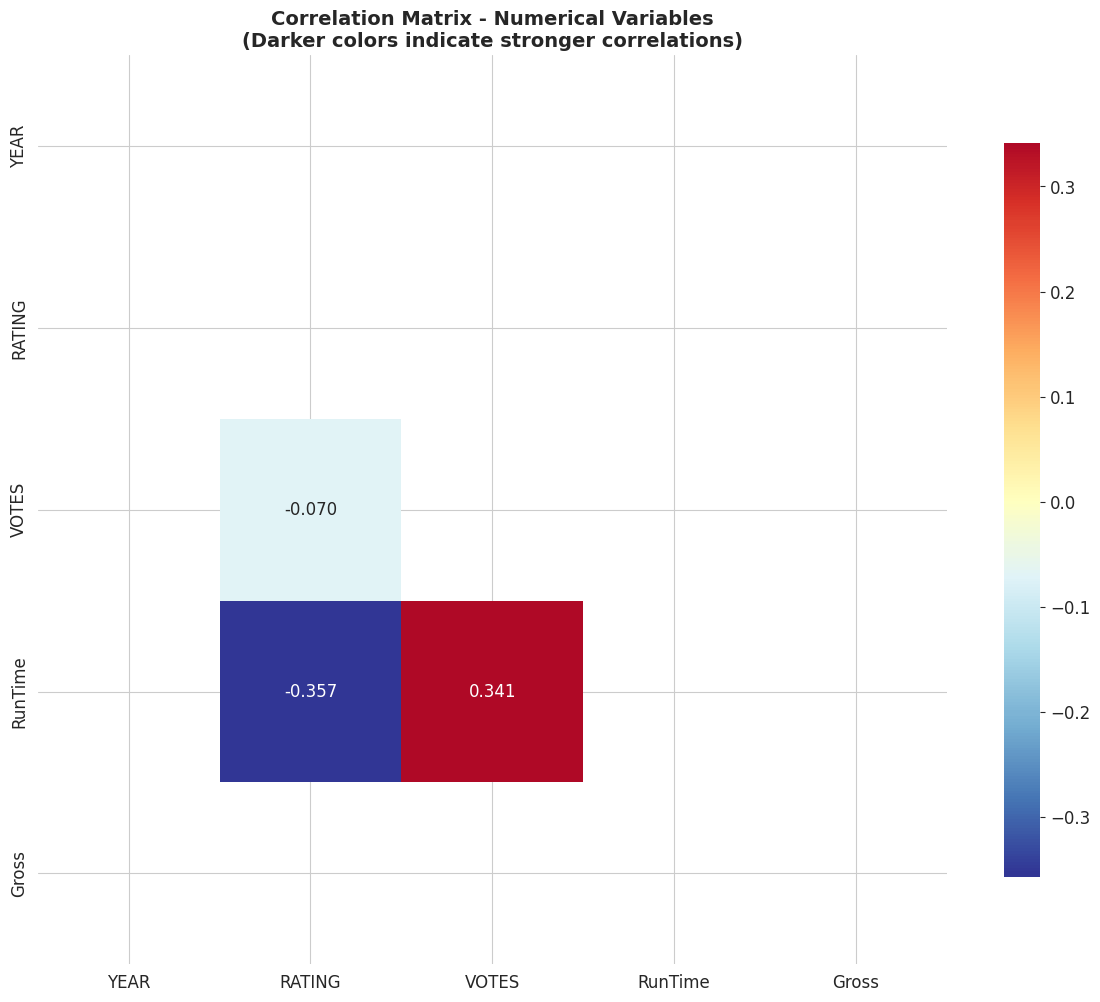


🔍 STRONGEST CORRELATIONS:


,Variable_1,Variable_2,Correlation,Abs_Correlation,Strength,Direction
5,RATING,RunTime,-0.356633,0.356633,Weak,Negative
7,VOTES,RunTime,0.341356,0.341356,Weak,Positive
4,RATING,VOTES,-0.069906,0.069906,Very Weak,Negative
0,YEAR,RATING,NaN,NaN,Very Weak,Negative
1,YEAR,VOTES,NaN,NaN,Very Weak,Negative
2,YEAR,RunTime,NaN,NaN,Very Weak,Negative
3,YEAR,Gross,NaN,NaN,Very Weak,Negative
6,RATING,Gross,NaN,NaN,Very Weak,Negative
8,VOTES,Gross,NaN,NaN,Very Weak,Negative
9,RunTime,Gross,NaN,NaN,Very Weak,Negative



📈 PAIRWISE SCATTER PLOTS:


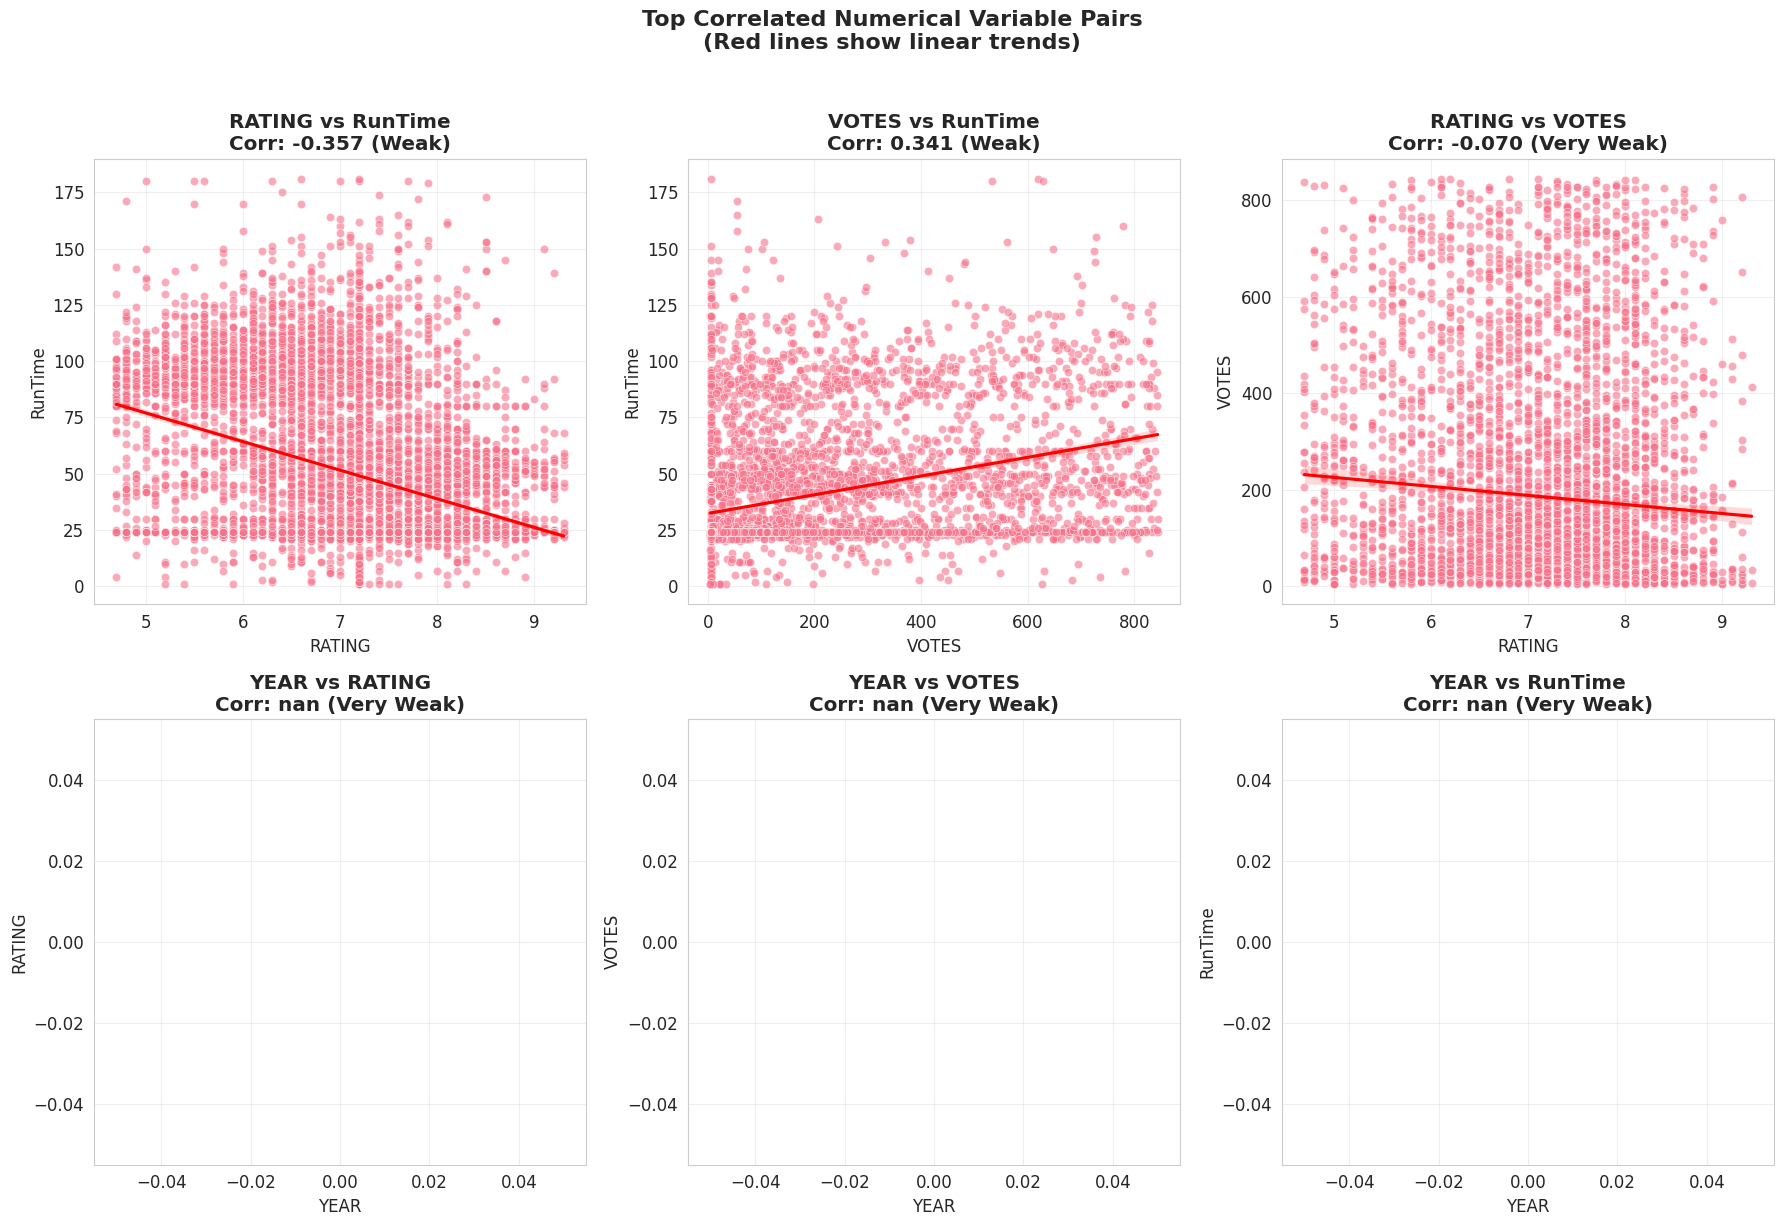


🎯 KEY INSIGHTS FROM NUMERICAL BIVARIATE ANALYSIS:
• Found 0 strong correlations (|r| ≥ 0.5)
• Strongest correlation: RATING & RunTime (r=-0.357)
• Average absolute correlation: 0.256

💡 MODELING IMPLICATIONS:
------------------------------
• High correlations may indicate multicollinearity issues
• Strong relationships can be leveraged for feature engineering
• Independent variables provide unique predictive information


In [208]:
# Bivariate Analysis - Numerical vs Numerical
print("🔢 BIVARIATE ANALYSIS - NUMERICAL vs NUMERICAL:")
print("=" * 80)

# Calculate correlation matrix
numerical_data = df_analysis[numerical_cols].copy()
correlation_matrix = numerical_data.corr()

print("📊 CORRELATION MATRIX:")
print("=" * 40)
display(correlation_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Hide upper triangle
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Numerical Variables\n(Darker colors indicate stronger correlations)',
          fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# Find and display strongest correlations
print("\n🔍 STRONGEST CORRELATIONS:")
print("=" * 40)

# Get correlation pairs (excluding self-correlations)
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlation_pairs.append({
            'Variable_1': var1,
            'Variable_2': var2,
            'Correlation': corr_value,
            'Abs_Correlation': abs(corr_value),
            'Strength': 'Very Strong' if abs(corr_value) >= 0.8 else
                       'Strong' if abs(corr_value) >= 0.6 else
                       'Moderate' if abs(corr_value) >= 0.4 else
                       'Weak' if abs(corr_value) >= 0.2 else 'Very Weak',
            'Direction': 'Positive' if corr_value > 0 else 'Negative'
        })

corr_df = pd.DataFrame(correlation_pairs).sort_values('Abs_Correlation', ascending=False)
display(corr_df.head(10))

# Create scatter plots for key relationships
print("\n📈 PAIRWISE SCATTER PLOTS:")
print("=" * 40)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Select most interesting relationships
top_relationships = corr_df.head(6)

for i, (_, row) in enumerate(top_relationships.iterrows()):
    if i < len(axes):
        var1, var2 = row['Variable_1'], row['Variable_2']

        # Create scatter plot with regression line
        sns.scatterplot(data=df_analysis, x=var1, y=var2, alpha=0.6, ax=axes[i])
        sns.regplot(data=df_analysis, x=var1, y=var2, scatter=False,
                   color='red', ax=axes[i])

        axes[i].set_title(f'{var1} vs {var2}\nCorr: {row["Correlation"]:.3f} ({row["Strength"]})',
                         fontweight='bold')
        axes[i].grid(True, alpha=0.3)

plt.suptitle('Top Correlated Numerical Variable Pairs\n(Red lines show linear trends)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\n🎯 KEY INSIGHTS FROM NUMERICAL BIVARIATE ANALYSIS:")
print("=" * 60)
strong_correlations = corr_df[corr_df['Abs_Correlation'] >= 0.5]
print(f"• Found {len(strong_correlations)} strong correlations (|r| ≥ 0.5)")

if not corr_df.empty:
    print(f"• Strongest correlation: {corr_df.iloc[0]['Variable_1']} & {corr_df.iloc[0]['Variable_2']} (r={corr_df.iloc[0]['Correlation']:.3f})")

print(f"• Average absolute correlation: {corr_df['Abs_Correlation'].mean():.3f}")

print("\n💡 MODELING IMPLICATIONS:")
print("-" * 30)
print("• High correlations may indicate multicollinearity issues")
print("• Strong relationships can be leveraged for feature engineering")
print("• Independent variables provide unique predictive information")

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB


In [210]:
df.info()
df_cleaned.info()
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOVIES    9569 non-null   category
 1   YEAR      0 non-null      float64 
 2   GENRE     9569 non-null   category
 3   RATING    9568 non-null   float64 
 4   ONE-LINE  9569 non-null   category
 5   STARS     9569 non-null   category
 6   VOTES  

#11 - Data Export After Cleaning


In [211]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOVIES    9569 non-null   category
 1   YEAR      0 non-null      float64 
 2   GENRE     9569 non-null   category
 3   RATING    9568 non-null   float64 
 4   ONE-LINE  9569 non-null   category
 5   STARS     9569 non-null   category
 6   VOTES     5818 non-null   float64 
 7   RunTime   9568 non-null   float64 
 8   Gross     9568 non-null   float64 
dtypes: category(4), float64(5)
memory usage: 1.5 MB


In [212]:
# Export cleaned dataset in multiple formats
print("💾 EXPORTING CLEANED DATASET:")
print("=" * 80)

# Final dataset summary
print("📊 FINAL DATASET SUMMARY:")
print("-" * 40)
print(f"• Original dataset size: {len(df):,} records")
print(f"• Final cleaned dataset size: {len(df_analysis):,} records")
print(f"• Records removed: {len(df) - len(df_analysis):,} ({((len(df) - len(df_analysis))/len(df))*100:.2f}%)")
print(f"• Features: {df_analysis.shape[1]} columns")
print(f"• Memory usage: {df_analysis.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check data quality before export
print(f"\n🔍 FINAL DATA QUALITY CHECK:")
print("-" * 40)
print(f"• Missing values: {df_analysis.isnull().sum().sum()}")
print(f"• Duplicate rows: {df_analysis.duplicated().sum()}")
print(f"• Data types: {df_analysis.dtypes.value_counts().to_dict()}")

# Export to different formats
print(f"\n📁 EXPORTING TO MULTIPLE FORMATS:")
print("-" * 40)

try:
    # 1. CSV Export
    df_analysis.to_csv('MOVIES_cleaned.csv', index=False)
    print("✅ CSV export completed: MOVIES_cleaned.csv")

    # 2. Excel Export with multiple sheets
    with pd.ExcelWriter('MOVIES_cleaned.xlsx', engine='openpyxl') as writer:
        df_analysis.to_excel(writer, sheet_name='Cleaned_Data', index=False)

        # Add summary statistics
        numerical_summary = df_analysis[numerical_cols].describe()
        numerical_summary.to_excel(writer, sheet_name='Numerical_Summary')

        # Add categorical summaries
        categorical_summaries = {}
        for col in categorical_cols:
            if col in df_analysis.columns:
                categorical_summaries[col] = df_analysis[col].value_counts()

        # Export categorical summaries to separate sheets (limited by Excel sheet name length)
        for col, summary in categorical_summaries.items():
            sheet_name = col.replace('-', '_')[:31]  # Excel sheet name limit
            summary.to_excel(writer, sheet_name=f'Cat_{sheet_name}')

    print("✅ Excel export completed: MOVIES_cleaned.xlsx")

    # 3. Pickle Export (preserves data types)
    df_analysis.to_pickle('MOVIES_cleaned.pkl')
    print("✅ Pickle export completed: MOVIES_cleaned.pkl")

except Exception as e:
    print(f"⚠️ Export error: {e}")
    print("Note: Some export formats may not be available in all environments")

# Create a data dictionary
print(f"\n📖 CREATING DATA DICTIONARY:")
print("-" * 40)

data_dictionary = {
    'Column_Name': [],
    'Data_Type': [],
    'Description': [],
    'Unique_Values': [],
    'Missing_Values': [],
    'Example_Values': []
}

column_descriptions = {
    'MOVIES': 'Movie name',
    'YEAR': 'Year/Years production',
    'GENRE': 'Genre(s)',
    'RATING': 'IMDb rating or similar',
    'ONE-LINE': 'Story in one line',
    'STARS': 'Stars playing',
    'VOTES': 'Number of votes',
    'RunTime': 'Runtime in minutes/hours',
    'Gross': 'Box office gross'


}

for col in df_analysis.columns:
    data_dictionary['Column_Name'].append(col)
    data_dictionary['Data_Type'].append(str(df_analysis[col].dtype))
    data_dictionary['Description'].append(column_descriptions.get(col, 'Description not available'))
    data_dictionary['Unique_Values'].append(df_analysis[col].nunique())
    data_dictionary['Missing_Values'].append(df_analysis[col].isnull().sum())

    # Get example values
    if df_analysis[col].dtype == 'object' or df_analysis[col].dtype.name == 'category':
        examples = df_analysis[col].value_counts().head(3).index.tolist()
    else:
        examples = df_analysis[col].quantile([0.25, 0.5, 0.75]).tolist()
    data_dictionary['Example_Values'].append(str(examples))

data_dict_df = pd.DataFrame(data_dictionary)
print("📋 DATA DICTIONARY:")
print("=" * 80)
display(data_dict_df)

# Save data dictionary
try:
    data_dict_df.to_csv('MOVIES_dict_cleaned.csv', index=False)
    print("✅ Data dictionary saved: MOVIES_cleaned.csv")
except:
    print("⚠️ Could not save data dictionary file")

print(f"\n🎉 EDA COMPLETION SUMMARY:")
print("=" * 50)
print("✅ Comprehensive Exploratory Data Analysis completed!")
print(f"✅ Dataset cleaned and prepared for modeling")
print(f"✅ {len(df_analysis):,} high-quality records ready for analysis")
print(f"✅ Multiple export formats created for different use cases")
print(f"✅ Data dictionary created for future reference")

print(f"\n📈 KEY FINDINGS:")
print("-" * 20)
print(f"• MOVIES distribution: {df_analysis['MOVIES'].value_counts().to_dict()}")
print(f"• Most important numerical variables identified through correlation analysis")
print(f"• Categorical variables analyzed for business insights")
print(f"• Data quality significantly improved through systematic cleaning")

print(f"\n🚀 NEXT STEPS:")
print("-" * 15)
print("• Use cleaned dataset for machine learning model development")
print("• Apply feature engineering based on EDA insights")
print("• Consider variable selection based on correlation analysis")
print("• Implement predictive models for income classification")
print("• Validate model performance using business metrics")

print(f"\n💡 RECOMMENDATIONS FOR MODELING:")
print("-" * 35)
print("• Handle class imbalance in target variable if needed")
print("• Consider feature scaling for numerical variables")
print("• Use appropriate encoding for categorical variables")
print("• Monitor for overfitting due to high-dimensional categorical data")
print("• Validate model performance on unseen data")

💾 EXPORTING CLEANED DATASET:
📊 FINAL DATASET SUMMARY:
----------------------------------------
• Original dataset size: 10,000 records
• Final cleaned dataset size: 8,360 records
• Records removed: 1,640 (16.40%)
• Features: 9 columns
• Memory usage: 4.90 MB

🔍 FINAL DATA QUALITY CHECK:
----------------------------------------
• Missing values: 11413
• Duplicate rows: 0
• Data types: {dtype('float64'): 5, CategoricalDtype(categories=[' Ada Twist, Scientist', ' Bom Dia, Verônica',
                  ' Breakfast, Lunch & Dinner', ' Love, Death & Robots',
                  ' The Mind, Explained',
                  ' Tiger King: Murder, Mayhem and Madness',
                  '#AnneFrank - Parallel Stories', '#BlackAF',
                  '#HappyBirthdaySense8', '#Realityhigh',
                  ...
                  'È stata la mano di Dio', 'Élite',
                  'Érase una vez... pero ya no', 'Ídolo', 'Òlòturé', 'Ófærð',
                  'Órbita 9', 'Ôkami to kôshinryô', 'Öldür Beni S

,Column_Name,Data_Type,Description,Unique_Values,Missing_Values,Example_Values
0,MOVIES,category,Movie name,5423,0,"['Bleach: Burîchi', 'La Reina de Indias y el C..."
1,YEAR,float64,Year/Years production,0,8360,"[nan, nan, nan]"
2,GENRE,category,Genre(s),479,0,"['\nComedy ', '\nAnimation, Action,..."
3,RATING,float64,IMDb rating or similar,47,1,"[6.6, 7.2, 7.7]"
4,ONE-LINE,category,Story in one line,7492,0,"['\nAdd a Plot\n', '\nPlot under wraps.', '\nP..."
5,STARS,category,Stars playing,6766,0,"['\n', '\n \n Stars:\nEmmanuel E..."
6,VOTES,float64,Number of votes,790,3050,"[7.0, 88.0, 289.0]"
7,RunTime,float64,Runtime in minutes/hours,173,1,"[24.0, 38.0, 72.0]"
8,Gross,float64,Box office gross,1,1,"[10000.0, 10000.0, 10000.0]"


✅ Data dictionary saved: MOVIES_cleaned.csv

🎉 EDA COMPLETION SUMMARY:
✅ Comprehensive Exploratory Data Analysis completed!
✅ Dataset cleaned and prepared for modeling
✅ 8,360 high-quality records ready for analysis
✅ Multiple export formats created for different use cases
✅ Data dictionary created for future reference

📈 KEY FINDINGS:
--------------------
• MOVIES distribution: {'Bleach: Burîchi': 66, 'La Reina de Indias y el Conquistador': 61, 'Avatar: The Last Airbender': 54, 'The Drew Barrymore Show': 45, 'Dexter': 44, 'Power Rangers Beast Morphers': 40, 'Johnny Test': 40, 'The Boondocks': 31, 'The Circle': 26, '7Seeds': 24, 'Virgin River': 22, 'Formula 1: Drive to Survive': 20, 'Dynasty': 20, 'La casa de las flores': 20, 'Queer Eye': 19, 'Power Rangers: Dino Fury': 19, 'Never Have I Ever': 19, 'Dark Desire': 19, 'Jurassic World: Camp Cretaceous': 18, 'The 100': 17, 'Supergirl': 17, 'Cobra Kai': 17, 'Glitch Techs': 17, 'Sky Rojo': 17, 'Black Lightning': 16, 'Go! Vive a Tu Manera': 

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB


In [214]:
df_analysis.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8360 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOVIES    8360 non-null   category
 1   YEAR      0 non-null      float64 
 2   GENRE     8360 non-null   category
 3   RATING    8359 non-null   float64 
 4   ONE-LINE  8360 non-null   category
 5   STARS     8360 non-null   category
 6   VOTES     5310 non-null   float64 
 7   RunTime   8359 non-null   float64 
 8   Gross     8359 non-null   float64 
dtypes: category(4), float64(5)
memory usage: 1.4 MB


In [215]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOVIES    9569 non-null   category
 1   YEAR      0 non-null      float64 
 2   GENRE     9569 non-null   category
 3   RATING    9568 non-null   float64 
 4   ONE-LINE  9569 non-null   category
 5   STARS     9569 non-null   category
 6   VOTES     5818 non-null   float64 
 7   RunTime   9568 non-null   float64 
 8   Gross     9568 non-null   float64 
dtypes: category(4), float64(5)
memory usage: 1.5 MB


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    10000 non-null  object
 1   YEAR      9356 non-null   object
 2   GENRE     9920 non-null   object
 3   RATING    8180 non-null   object
 4   ONE-LINE  10000 non-null  object
 5   STARS     10000 non-null  object
 6   VOTES     8180 non-null   object
 7   RunTime   7042 non-null   object
 8   Gross     461 non-null    object
dtypes: object(9)
memory usage: 703.3+ KB


#Linear Regression Deep Learning NN with ReLU

Shape after dropping rows with missing RATING or Gross: (8359, 9)
   RATING    Gross
1     6.1  10000.0
2     5.0  10000.0
3     8.2  10000.0
4     9.2  10000.0
5     7.2  10000.0
RegressionModel(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)
Epoch [20/200], Loss: 1.0012
Epoch [40/200], Loss: 1.0000
Epoch [60/200], Loss: 1.0000
Epoch [80/200], Loss: 1.0000
Epoch [100/200], Loss: 1.0000
Epoch [120/200], Loss: 1.0000
Epoch [140/200], Loss: 1.0000
Epoch [160/200], Loss: 1.0000
Epoch [180/200], Loss: 1.0000
Epoch [200/200], Loss: 1.0000
MSE: 0.889720618724823
MAE: 0.720272421836853
R²: -0.0006034374237060547


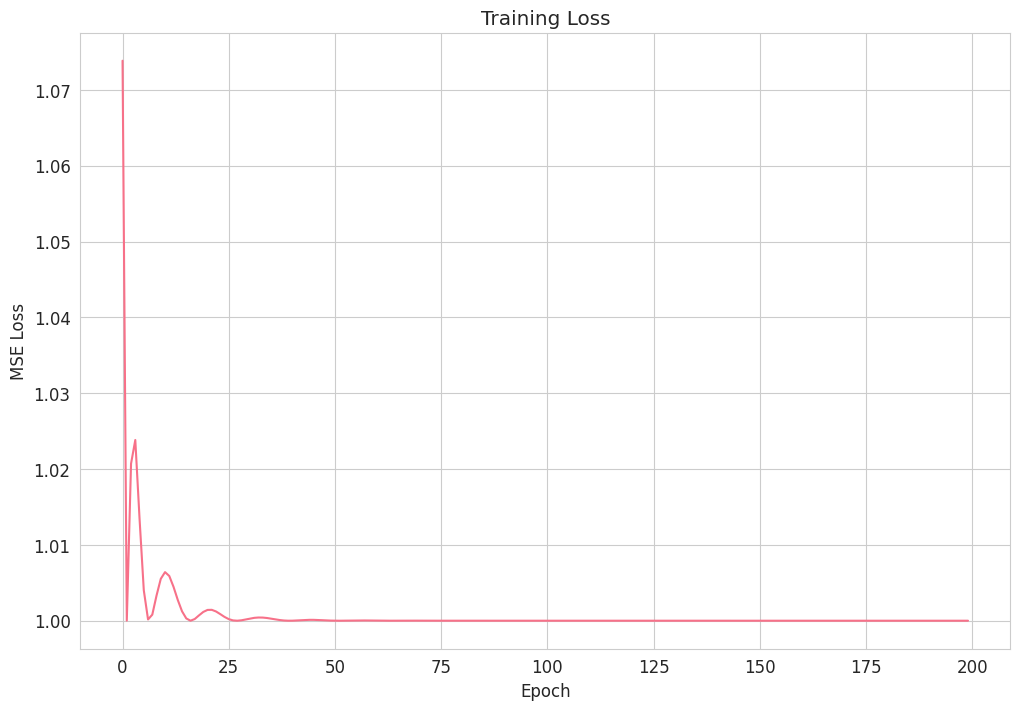

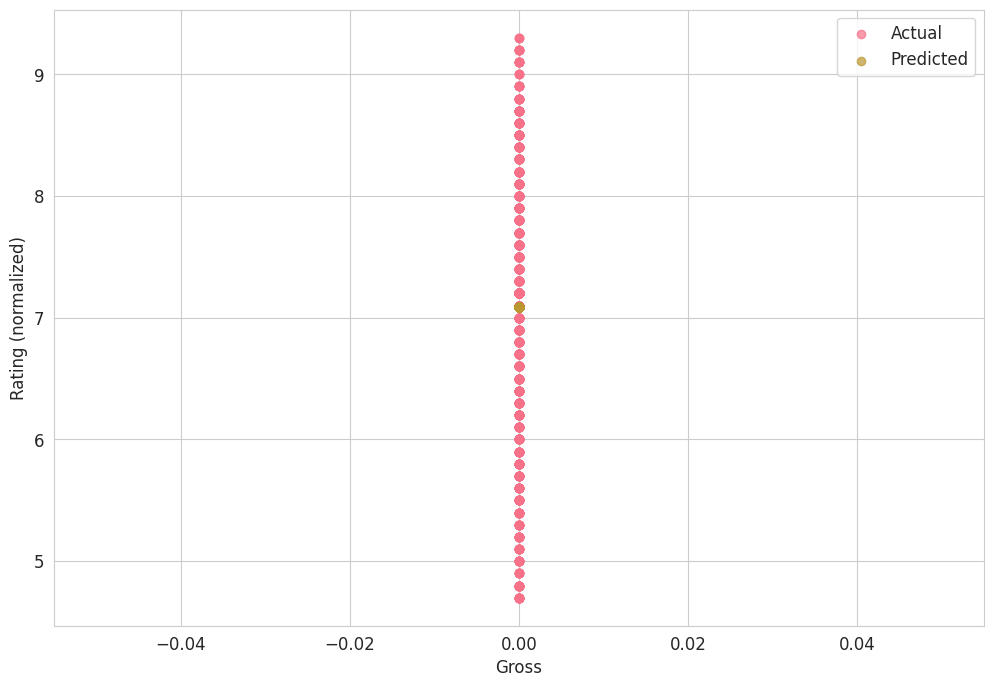

In [217]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

# Step 2: Load dataset
df = pd.read_csv("/content/MOVIES_cleaned.csv")


# Step 3: Data Preprocessing for 'Gross' and handling missing values
# Convert 'Gross' to numeric by removing '$' and 'M' and handling potential errors
df['Gross'] = df['Gross'].astype(str).str.replace('$', '', regex=False).str.replace('M', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Convert 'RATING' to numeric as well, coercing errors
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')


# Drop rows with missing values in 'RATING' or 'Gross'
df_cleaned = df.dropna(subset=['RATING', 'Gross']).copy()

print("Shape after dropping rows with missing RATING or Gross:", df_cleaned.shape)
print(df_cleaned[["RATING", "Gross"]].head())


# Step 4: Select features and target from the cleaned DataFrame
# Reshape X and y to be 2D arrays as required by StandardScaler
X = df_cleaned["Gross"].values.reshape(-1,1)
y = df_cleaned["RATING"].values.reshape(-1,1)

# Step 5: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Normalize features
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train) # y_train is already 2D
y_test = scaler_y.transform(y_test)     # y_test is already 2D

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Step 7: Build PyTorch regression model
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # linear output
        )

    def forward(self, x):
        return self.net(x)

model = RegressionModel()
print(model)

# Step 8: Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 9: Train model
epochs = 200
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Step 10: Evaluate model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

# Inverse transform predictions
y_pred_inv = scaler_y.inverse_transform(y_pred.numpy())
y_test_inv = scaler_y.inverse_transform(y_test_tensor.numpy())

print("MSE:", mean_squared_error(y_test_inv, y_pred_inv))
print("MAE:", mean_absolute_error(y_test_inv, y_pred_inv))
print("R²:", r2_score(y_test_inv, y_pred_inv))

# Step 11: Plot training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.show()

# Step 12: Plot predictions vs actual
plt.scatter(X_test, y_test_inv, label="Actual", alpha=0.7)
plt.scatter(X_test, y_pred_inv, label="Predicted", alpha=0.7)
plt.ylabel("Rating (normalized)")
plt.xlabel("Gross")
plt.legend()
plt.show()

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8360 entries, 0 to 8359
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    8360 non-null   object 
 1   YEAR      0 non-null      float64
 2   GENRE     8360 non-null   object 
 3   RATING    8359 non-null   float64
 4   ONE-LINE  8360 non-null   object 
 5   STARS     8360 non-null   object 
 6   VOTES     5310 non-null   float64
 7   RunTime   8359 non-null   float64
 8   Gross     8359 non-null   float64
dtypes: float64(5), object(4)
memory usage: 587.9+ KB


In [219]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 1 to 8359
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    8359 non-null   object 
 1   YEAR      0 non-null      float64
 2   GENRE     8359 non-null   object 
 3   RATING    8359 non-null   float64
 4   ONE-LINE  8359 non-null   object 
 5   STARS     8359 non-null   object 
 6   VOTES     5310 non-null   float64
 7   RunTime   8359 non-null   float64
 8   Gross     8359 non-null   float64
dtypes: float64(5), object(4)
memory usage: 653.0+ KB


In [220]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 1 to 8359
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    8359 non-null   object 
 1   YEAR      0 non-null      float64
 2   GENRE     8359 non-null   object 
 3   RATING    8359 non-null   float64
 4   ONE-LINE  8359 non-null   object 
 5   STARS     8359 non-null   object 
 6   VOTES     5310 non-null   float64
 7   RunTime   8359 non-null   float64
 8   Gross     8359 non-null   float64
dtypes: float64(5), object(4)
memory usage: 653.0+ KB


#Linear Regression

Shape after dropping rows: (8359, 9)
   RATING    Gross
1     6.1  10000.0
2     5.0  10000.0
3     8.2  10000.0
4     9.2  10000.0
5     7.2  10000.0
RegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Epoch [20/200], Loss: 1.1328
Epoch [40/200], Loss: 1.0592
Epoch [60/200], Loss: 1.0264
Epoch [80/200], Loss: 1.0118
Epoch [100/200], Loss: 1.0052
Epoch [120/200], Loss: 1.0023
Epoch [140/200], Loss: 1.0010
Epoch [160/200], Loss: 1.0005
Epoch [180/200], Loss: 1.0002
Epoch [200/200], Loss: 1.0001
MSE: 0.8893939256668091
MAE: 0.7179679870605469
R²: -0.00023603439331054688


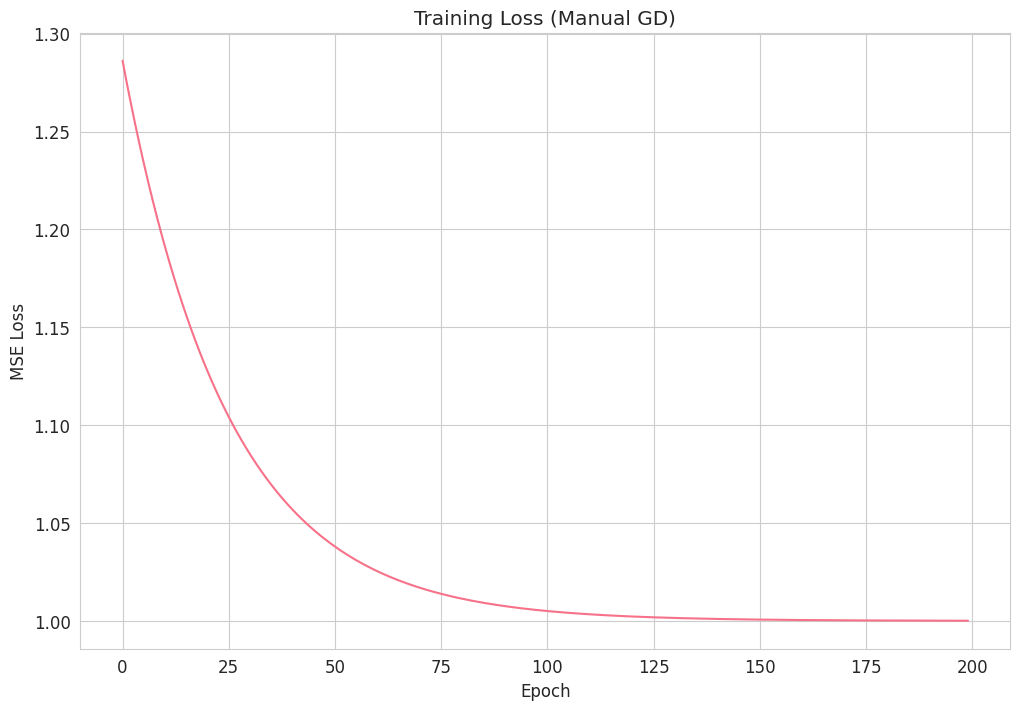

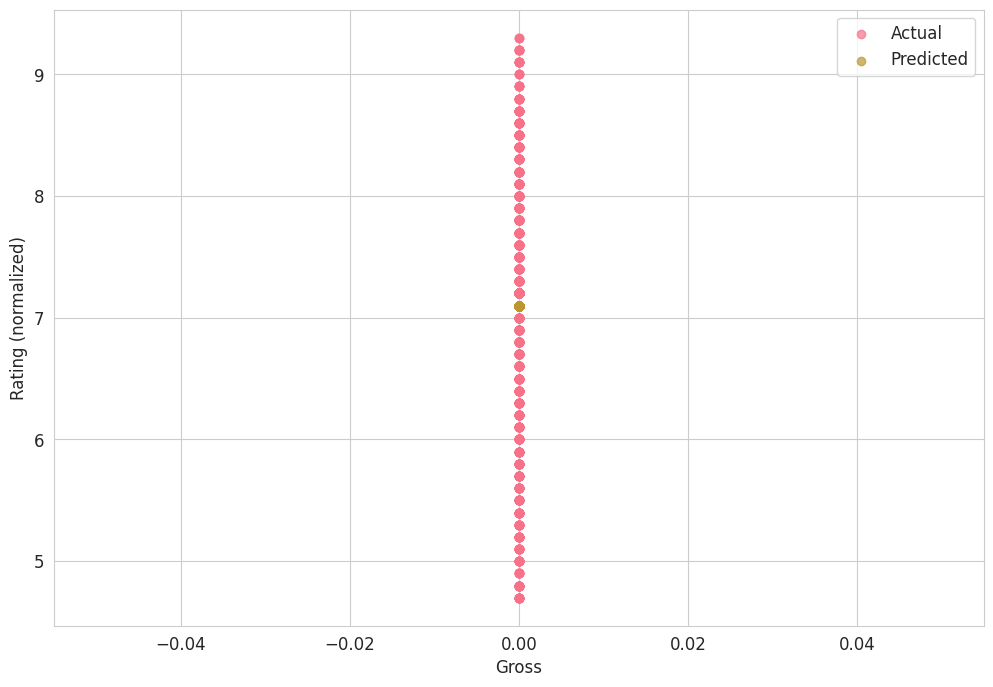

In [221]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn

# Step 2: Load dataset
df = pd.read_csv("/content/MOVIES_cleaned.csv")

# Step 3: Data Preprocessing for 'Gross' and handling missing values
df['Gross'] = df['Gross'].astype(str).str.replace('$', '', regex=False).str.replace('M', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

df_cleaned = df.dropna(subset=['RATING', 'Gross']).copy()

print("Shape after dropping rows:", df_cleaned.shape)
print(df_cleaned[["RATING", "Gross"]].head())

# Step 4: Select features and target

X = df_cleaned["Gross"].values.reshape(-1,1)
y = df_cleaned["RATING"].values.reshape(-1,1)

# Step 5: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Normalize features
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Step 7: Build simple regression model (no ReLU, just Linear)
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # single layer

    def forward(self, x):
        return self.linear(x)

model = RegressionModel()
print(model)

# Step 8: Loss function
criterion = nn.MSELoss()

# Step 9: Manual Gradient Descent training (no optim, no Adam)
learning_rate = 0.01
epochs = 200
losses = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    loss.backward()

    # Manual parameter update
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Zero gradients
    model.zero_grad()

    losses.append(loss.item())
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Step 10: Evaluate model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

# Inverse transform predictions
y_pred_inv = scaler_y.inverse_transform(y_pred.numpy())
y_test_inv = scaler_y.inverse_transform(y_test_tensor.numpy())

print("MSE:", mean_squared_error(y_test_inv, y_pred_inv))
print("MAE:", mean_absolute_error(y_test_inv, y_pred_inv))
print("R²:", r2_score(y_test_inv, y_pred_inv))

# Step 11: Plot training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss (Manual GD)")
plt.show()



X_test.ndim

# Step 12: Plot predictions vs actual
plt.scatter(X_test, y_test_inv, label="Actual", alpha=0.7)
plt.scatter(X_test, y_pred_inv, label="Predicted", alpha=0.7)
plt.ylabel("Rating (normalized)")
plt.xlabel("Gross")
plt.legend()
plt.show()
